## Setup

In [82]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [83]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [100]:
PHRASES = ['Autism',
 'Charlie / Kirk',
 'Autopen / Auto Pen',
 'Warp Speed',
 'Vaccine',
 'Tylenol',
 'TikTok',
 'Republican',
 'Prescription',
 'Pregnant / Pregnancy',
 'Pharmaceutical',
 'Pharma',
 'Painkiller',
 'Over the Counter',
 'NIH / National Institutes of Health',
 'MAHA / Make America Healthy Again',
 'Lobby / Lobbyist',
 'Hottest',
 'Fitness / Exercise',
 'FDA / Food and Drug Administration',
 'Diet / Nutrition',
 'Democrat',
 'Covid',
 'China',
 'CDC / Centers for Disease Control',
 'Biden']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'Autism': "\\b(?:\\w+-)*(?:autism|autisms|autism's|autisms')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Autopen / Auto Pen': "\\b(?:\\w+-)*(?:(?:autopen|autopens|autopen's|autopens'|auto[\\s,\\-]+pen|auto[\\s,\\-]+pens|auto[\\s,\\-]+pen's|auto[\\s,\\-]+pens'|autos[\\s,\\-]+pen|autos[\\s,\\-]+pens|autos[\\s,\\-]+pen's|autos[\\s,\\-]+pens'|auto's[\\s,\\-]+pen|auto's[\\s,\\-]+pens|auto's[\\s,\\-]+pen's|auto's[\\s,\\-]+pens'|autos'[\\s,\\-]+pen|autos'[\\s,\\-]+pens|autos'[\\s,\\-]+pen's|autos'[\\s,\\-]+pens'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Biden': "\\b(?:\\w+-)*(?:biden|bidens|biden's|bidens')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'CDC / Centers for Disease Control': "\\b(?:\\w+-)*(?:(?:cdc|cdcs|cdc's|cdcs'|centers[\\s,\\-]+for[\\s,\\-]+disease[\\s,\\-]+control|centers[\\s,\\-]+for[\\s,\\-]+disease[\\s,\\-]+controls|centers[\\s,\\-]+for[\\s,\\-]+disease[\\s,\\-]+control's|centers[\\s,\\-]+for[\\s,\\-]+disease[\\s,\\-]+controls'|centers[\\s,\\-]+for[\\s,\\-]+diseases[\\s,\\-]+control|centers[\\s,\\-]+for[

In [101]:
# Set the category of interest
CATEGORY_OF_INTEREST = "remarks"

# Process transcripts
df = process_directory('../data/processed-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Filter out press briefings and state of the union
df = df[df['category'] != 'press briefing']
df = df[df['category'] != 'sotu']

# Split data by date and category
category_mask = df['category'] == CATEGORY_OF_INTEREST
date_mask = df['date'] >= INAUGURATION_DATE

# Create category of interest dataframes 
df_category = df[category_mask]
df_category_pre = df[category_mask & ~date_mask]
df_category_post = df[category_mask & date_mask]

df_non_category = df[~category_mask]
df_pre = df[~date_mask]
df_post = df[date_mask]

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")
print(f"Pre-inauguration: {len(df_pre)}")
print(f"Post-inauguration: {len(df_post)}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_category)}")
print(f"Pre-inauguration: {len(df_category_pre)}")
print(f"Post-inauguration: {len(df_category_post)}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_non_category)}")
print(f"Pre-inauguration: {len(df_non_category[df_non_category['date'] < INAUGURATION_DATE])}")
print(f"Post-inauguration: {len(df_non_category[df_non_category['date'] >= INAUGURATION_DATE])}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_category['text_length'].mean():.0f} words") 

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_non_category['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_category['date'].min().strftime('%Y-%m-%d')} to {df_category['date'].max().strftime('%Y-%m-%d')}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_non_category['date'].min().strftime('%Y-%m-%d')} to {df_non_category['date'].max().strftime('%Y-%m-%d')}")

Categories found in directory:
- b-roll
- convention
- court transcript
- debate
- donald trump vlog
- interview
- interview - not public
- leaked remarks
- leaked transcript
- letter
- mueller report
- official document
- op-ed
- prepared remarks
- press briefing
- press conference
- press gaggle
- processed-transcripts
- remarks
- sotu
- speech
- un-addresses
- uncategorized
- weekly address
Dataset Statistics:

All Transcripts:
Total: 3707
Pre-inauguration: 3310
Post-inauguration: 397

Remarkss:
Total: 1484
Pre-inauguration: 1286
Post-inauguration: 198

Non-Remarkss:
Total: 2223
Pre-inauguration: 2024
Post-inauguration: 199

Word Count Statistics:

All Transcripts:
Average length: 3339 words

Remarkss:
Average length: 1862 words

Non-Remarkss:
Average length: 4325 words

Date Ranges:

All Transcripts:
Date range: 2016-07-01 to 2025-09-21

Remarkss:
Date range: 2016-07-20 to 2025-09-19

Non-Remarkss:
Date range: 2016-07-01 to 2025-09-21


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


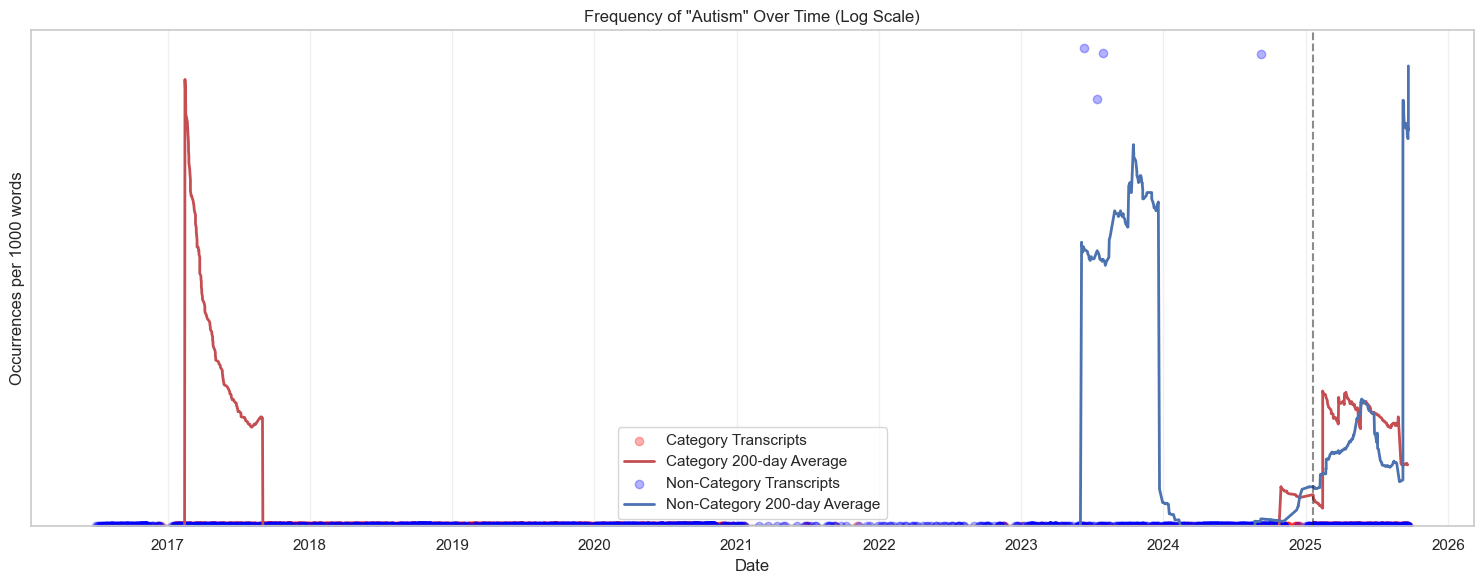


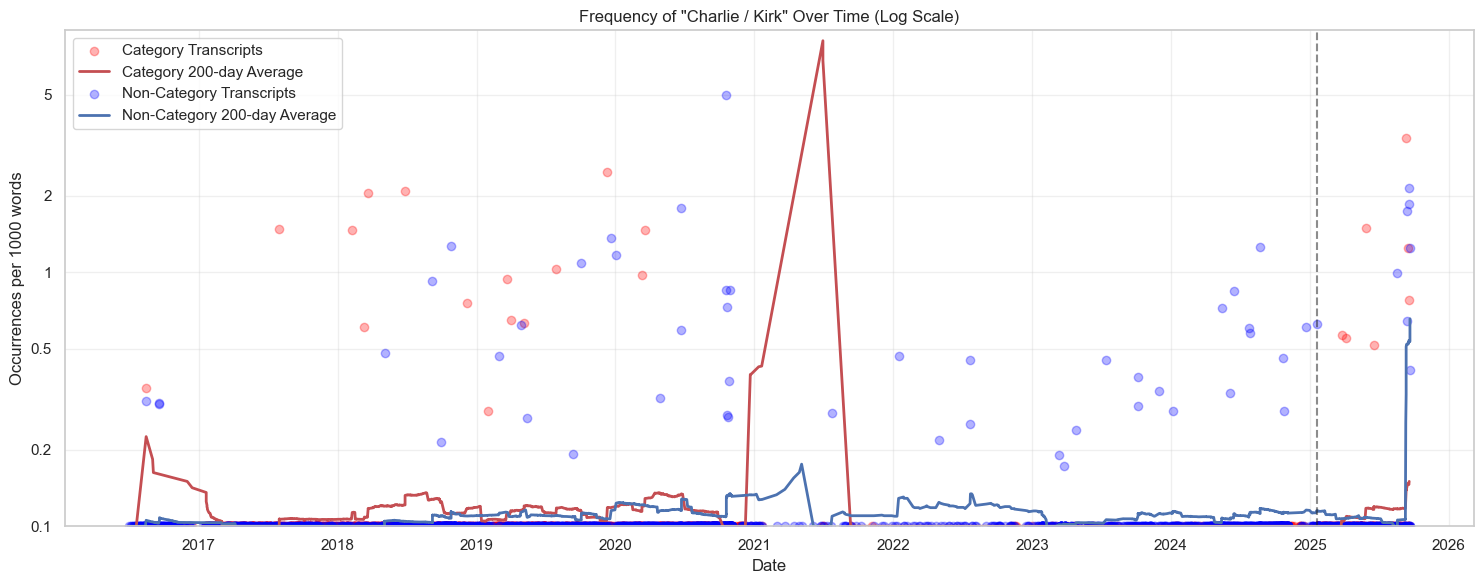


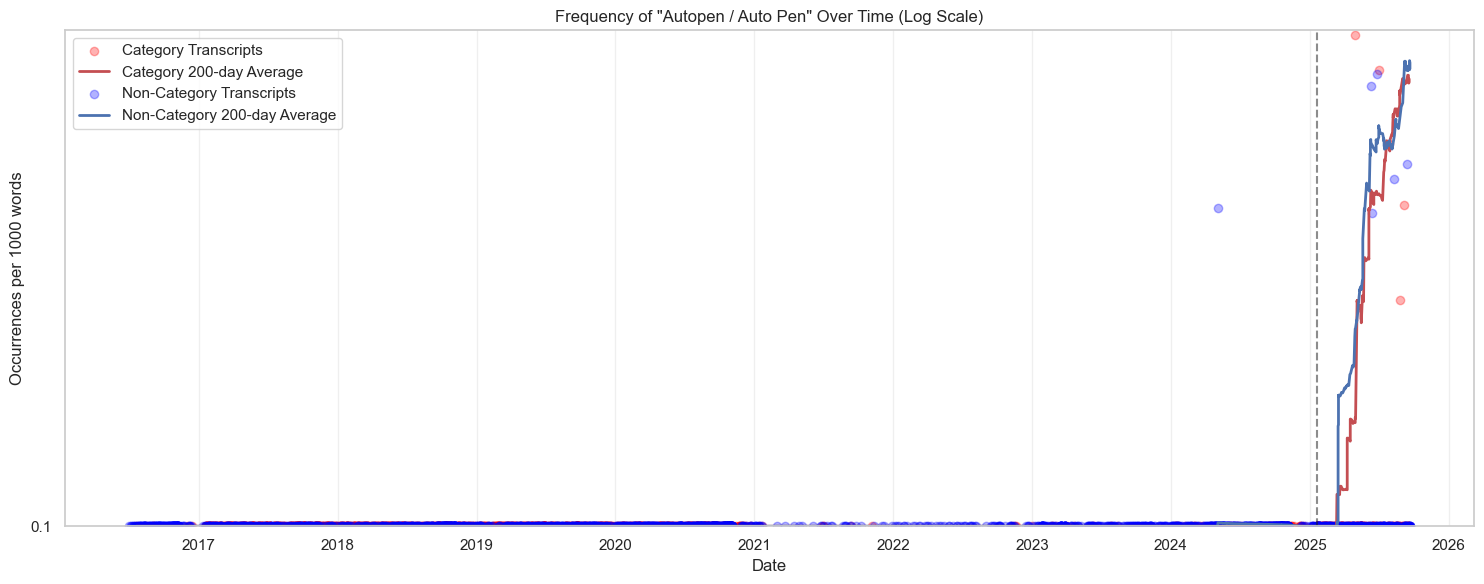


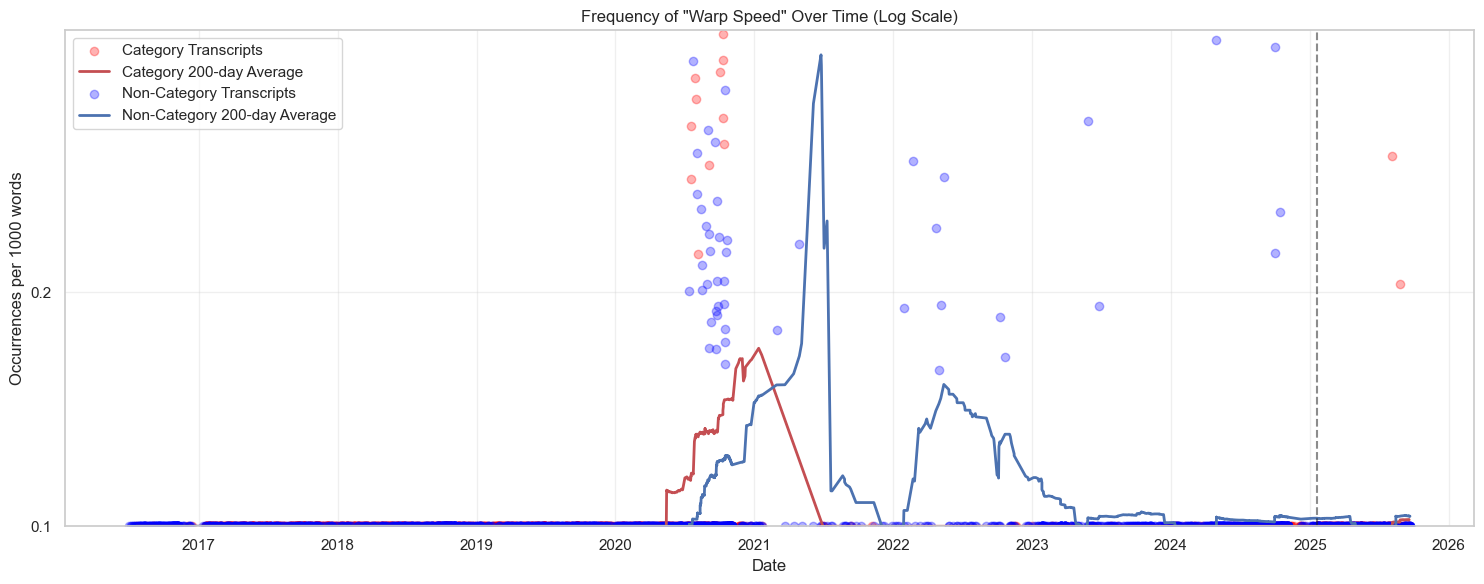


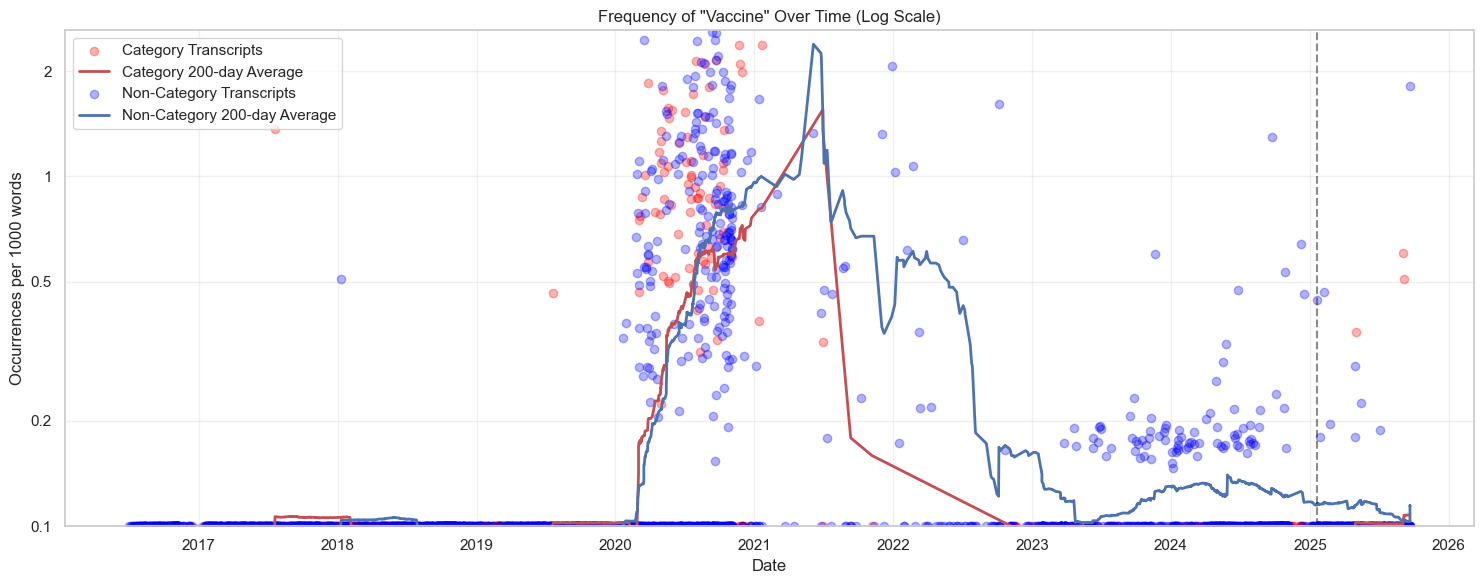


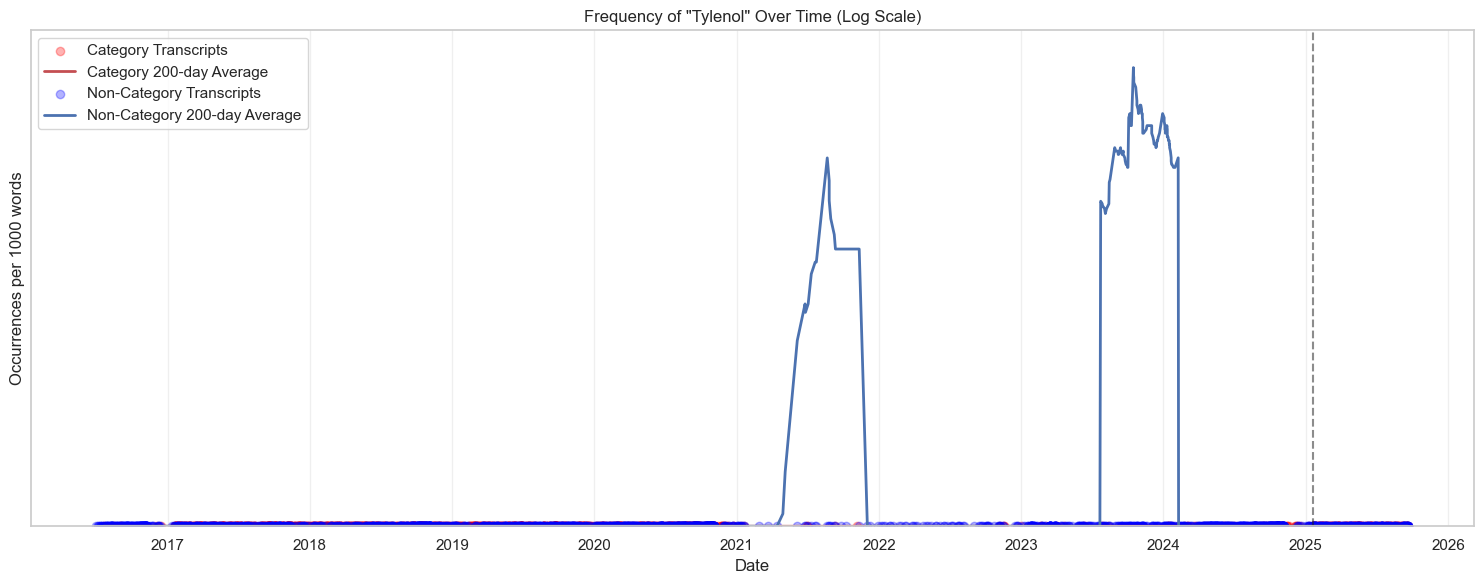


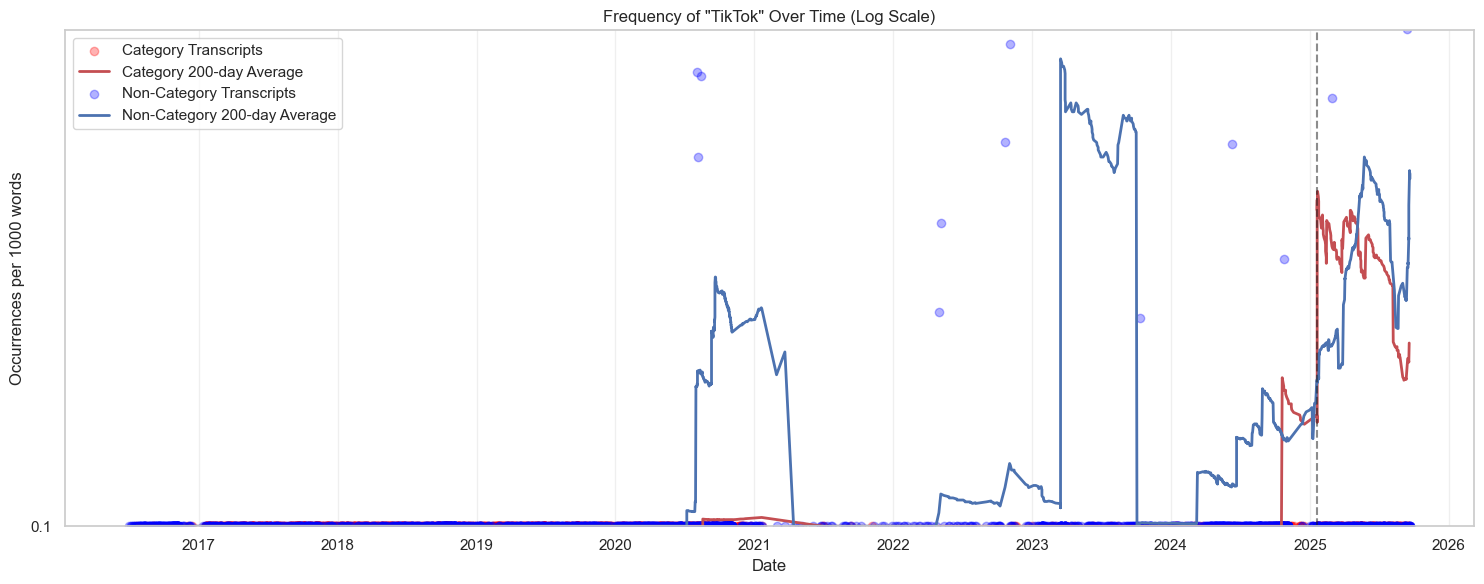


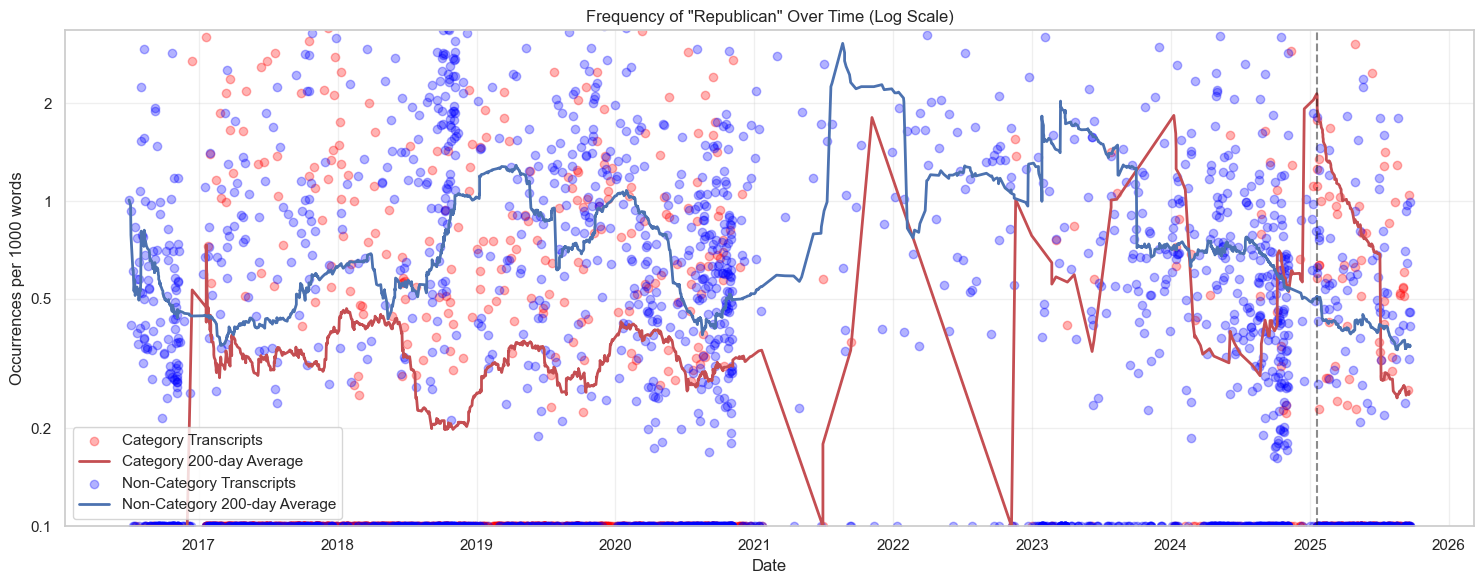


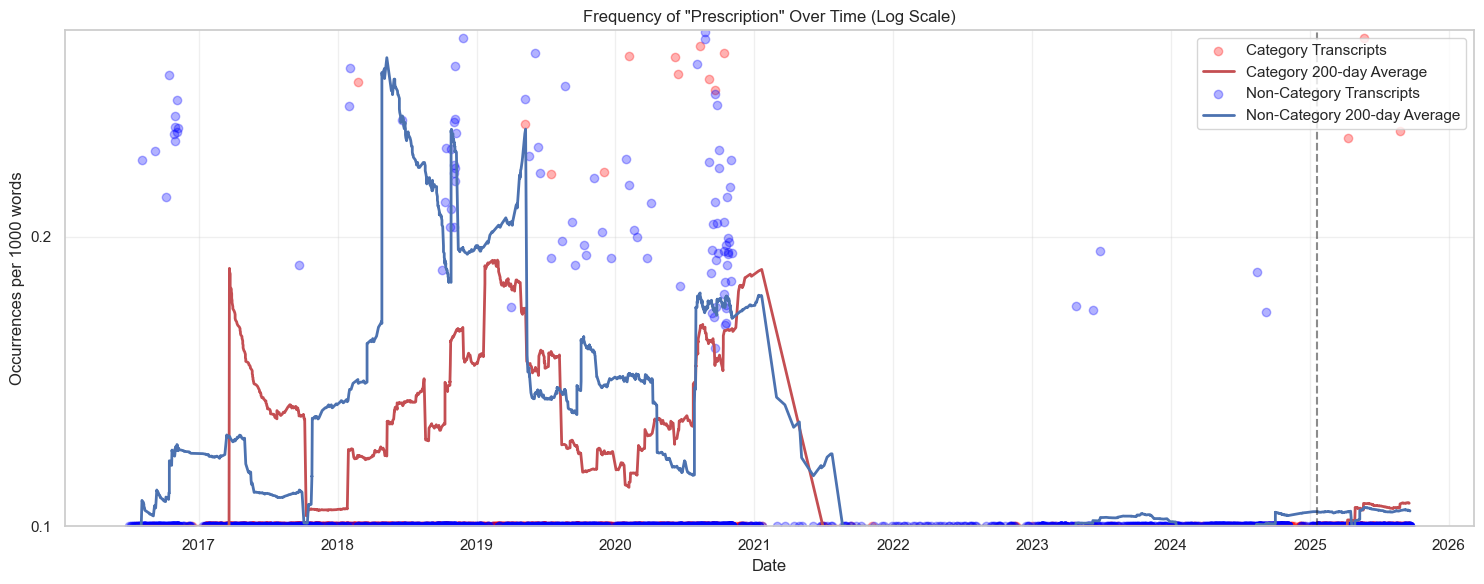


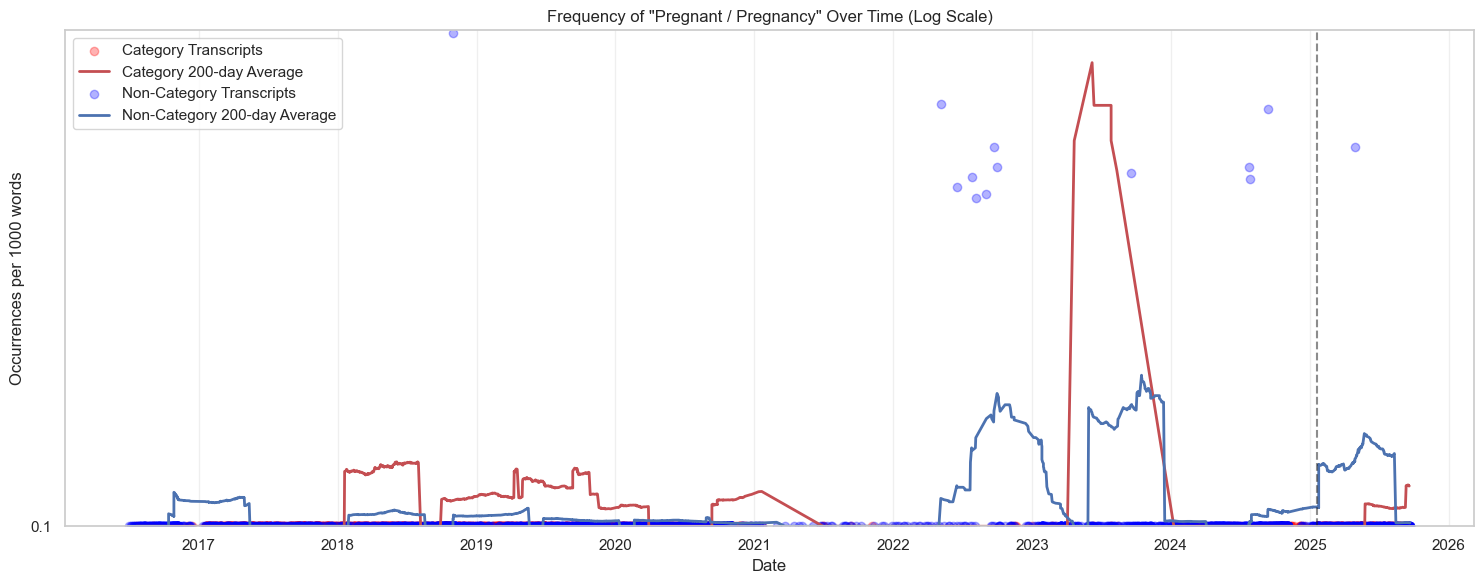


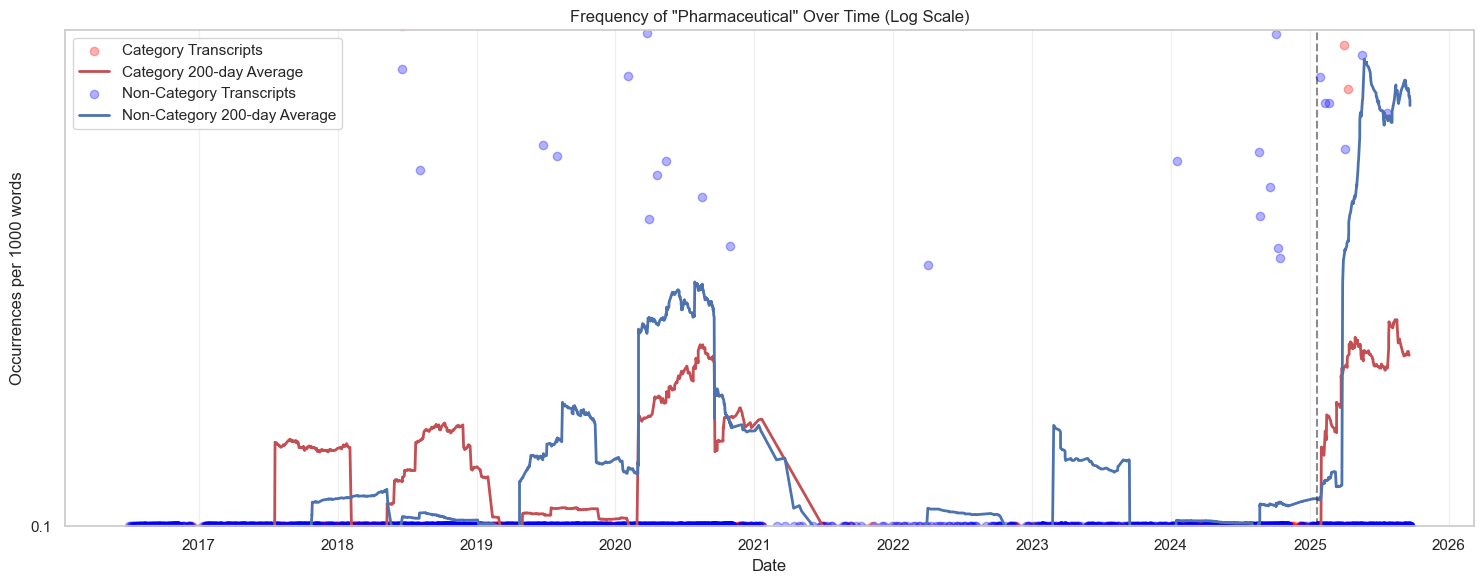


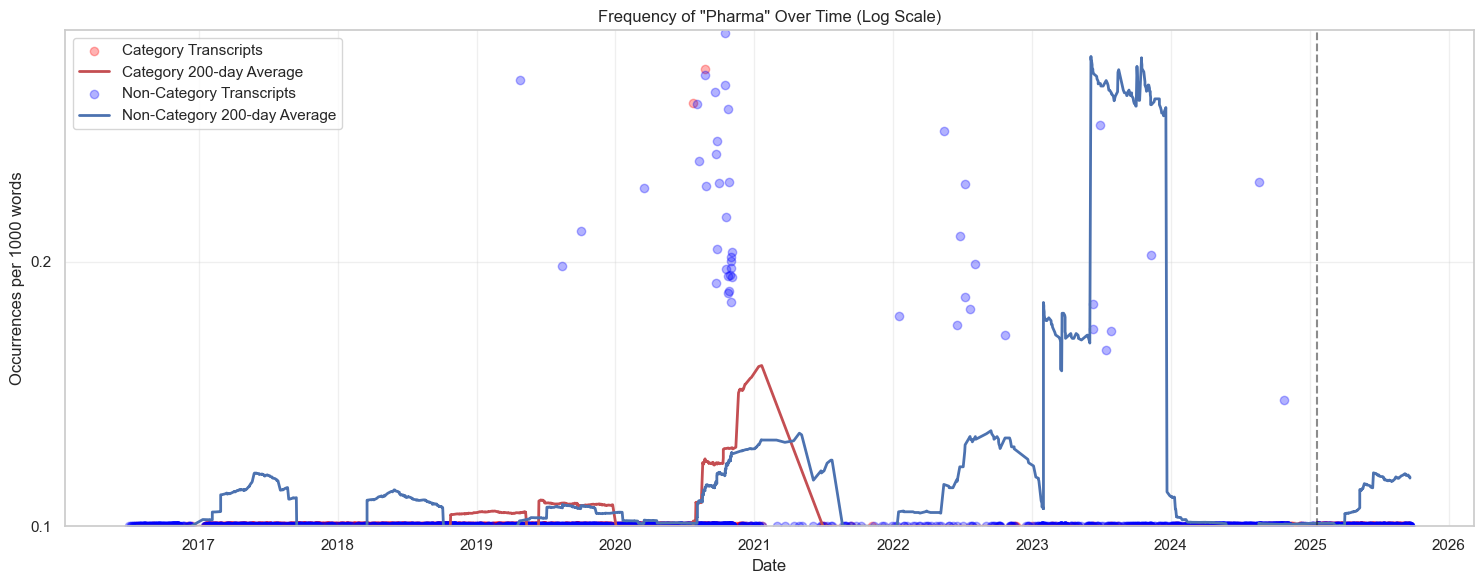


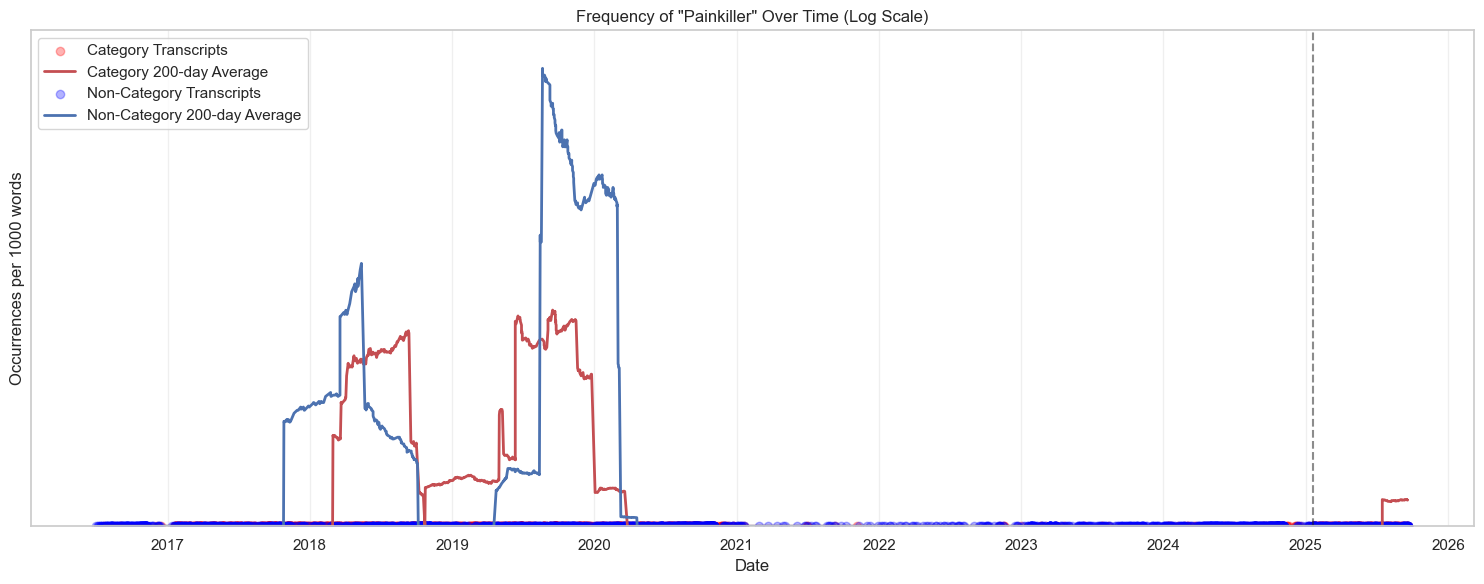


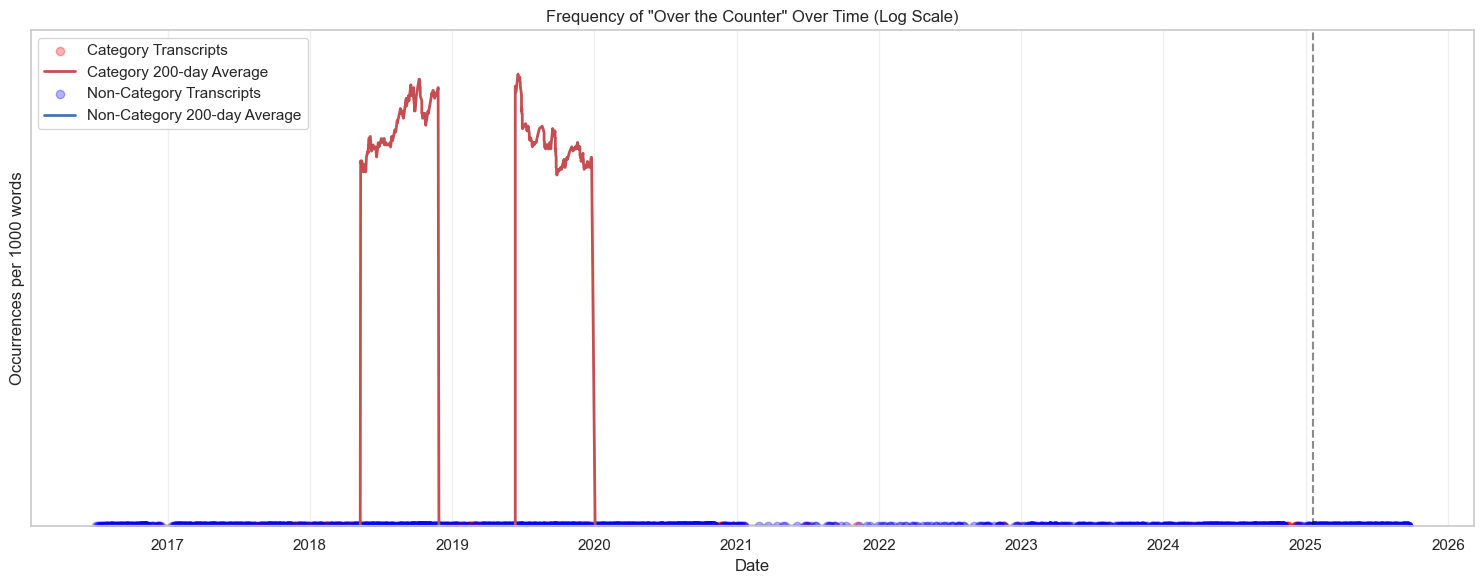


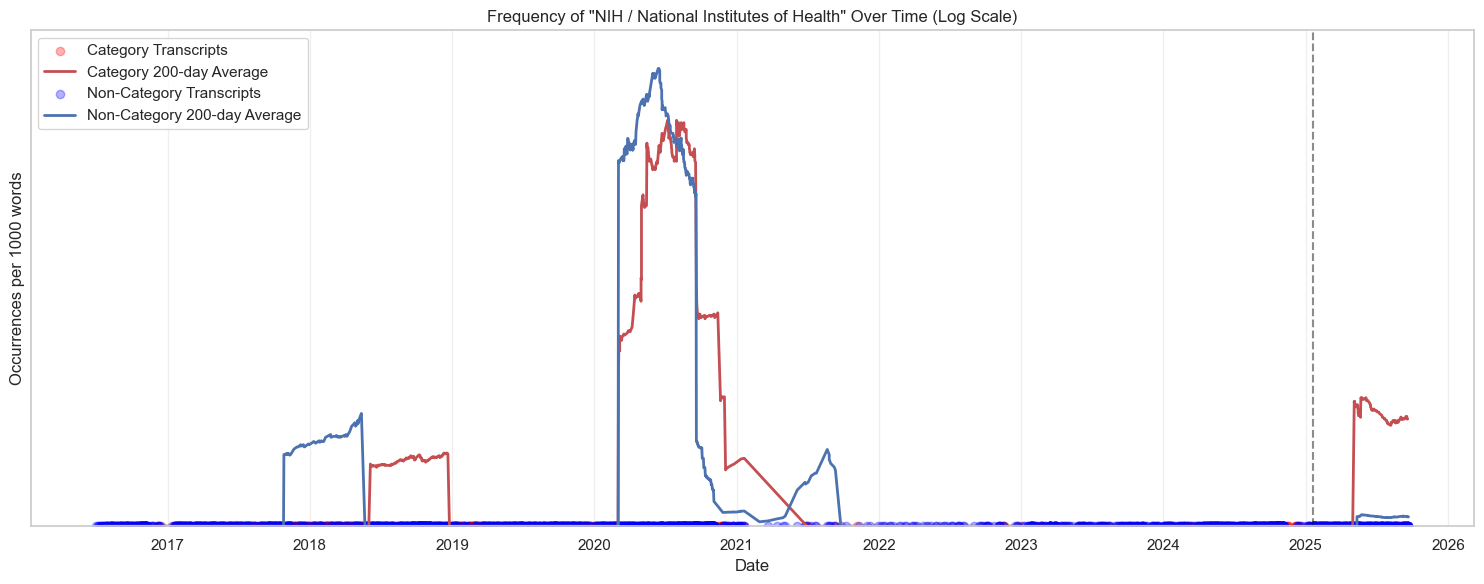


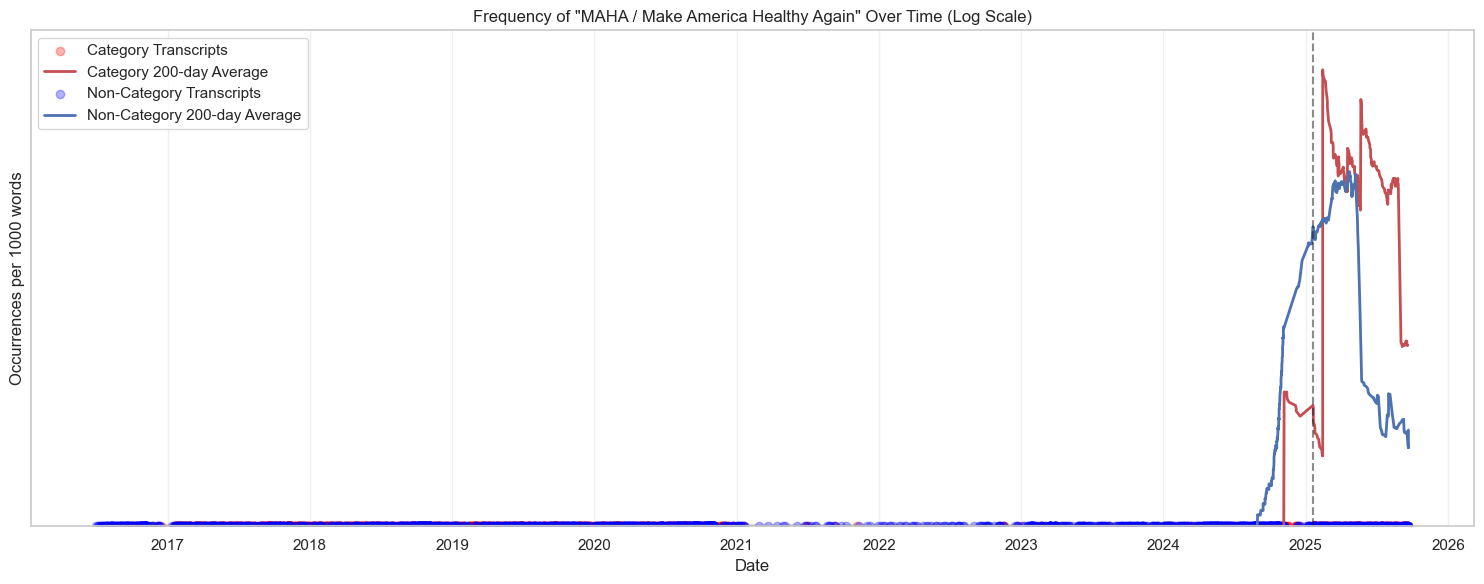


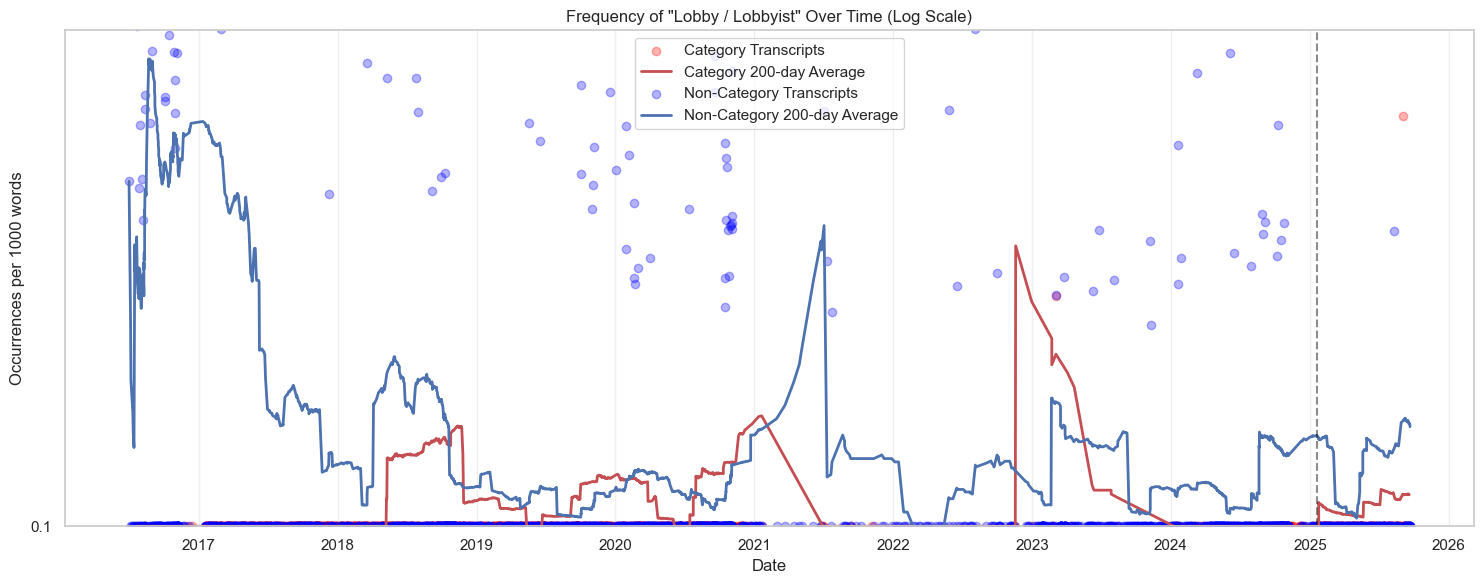


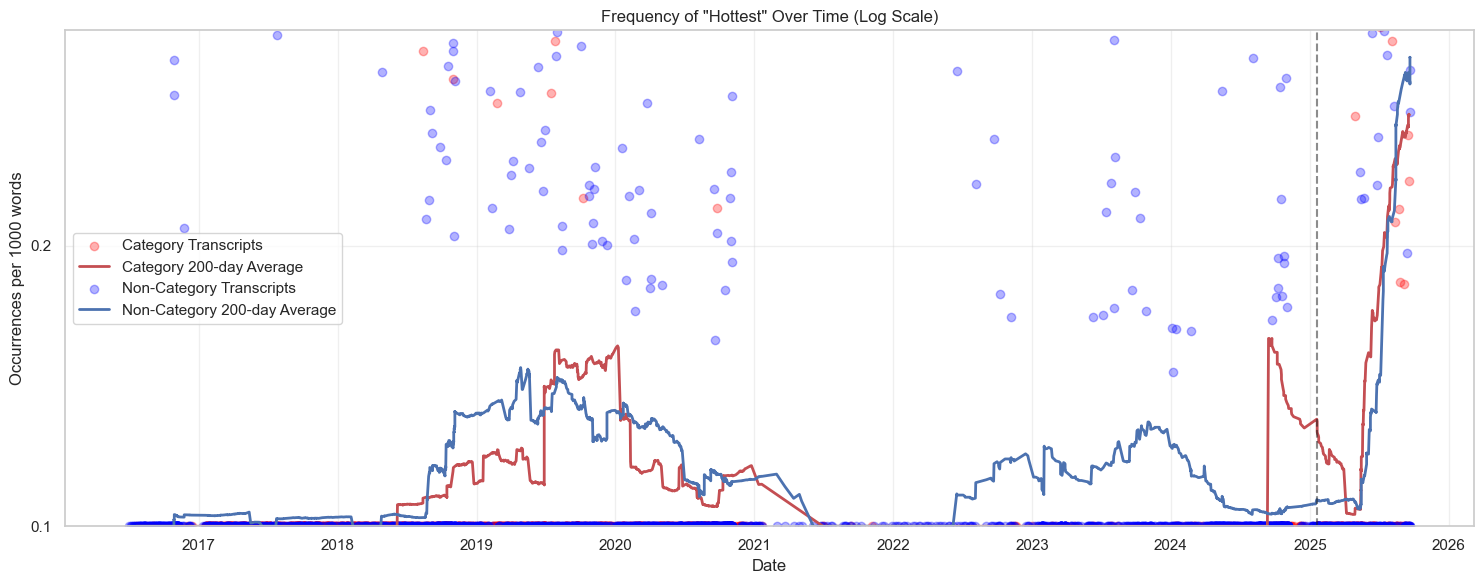


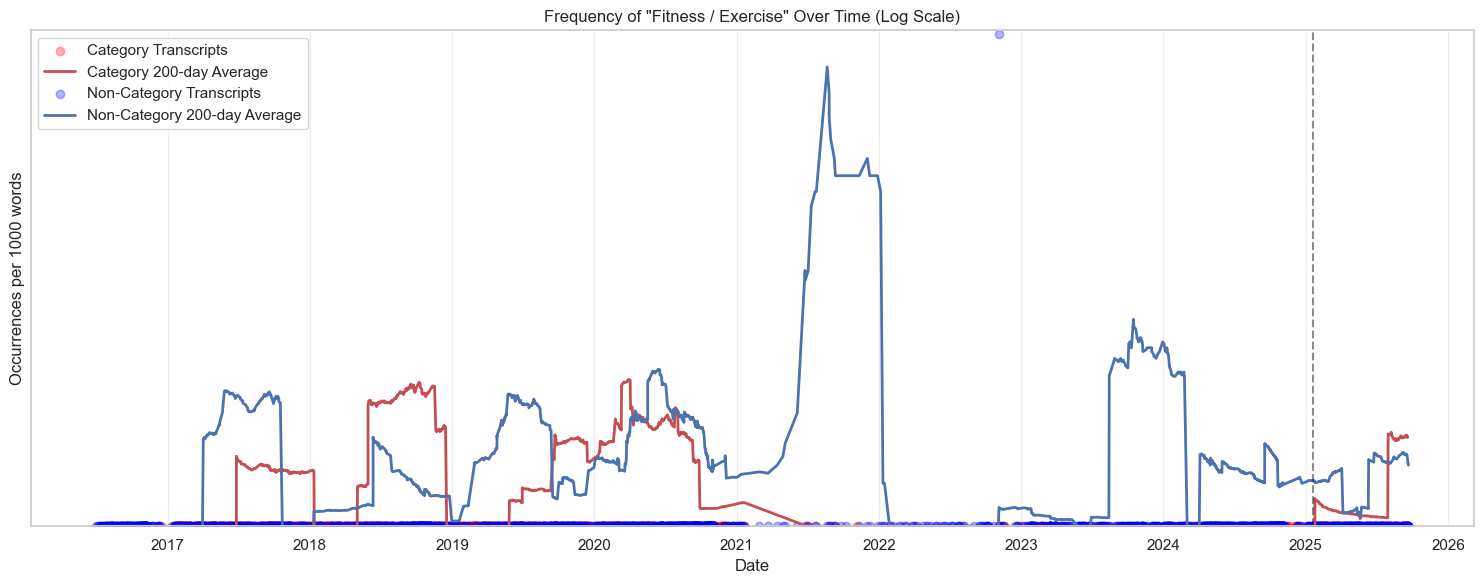


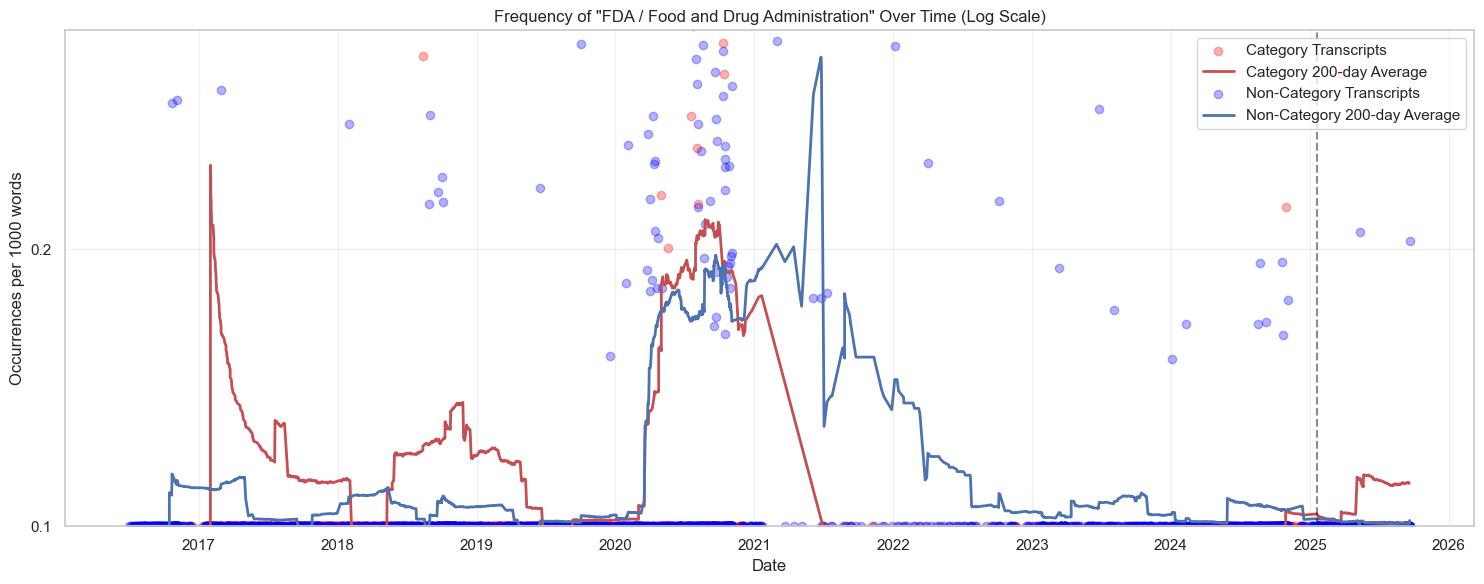


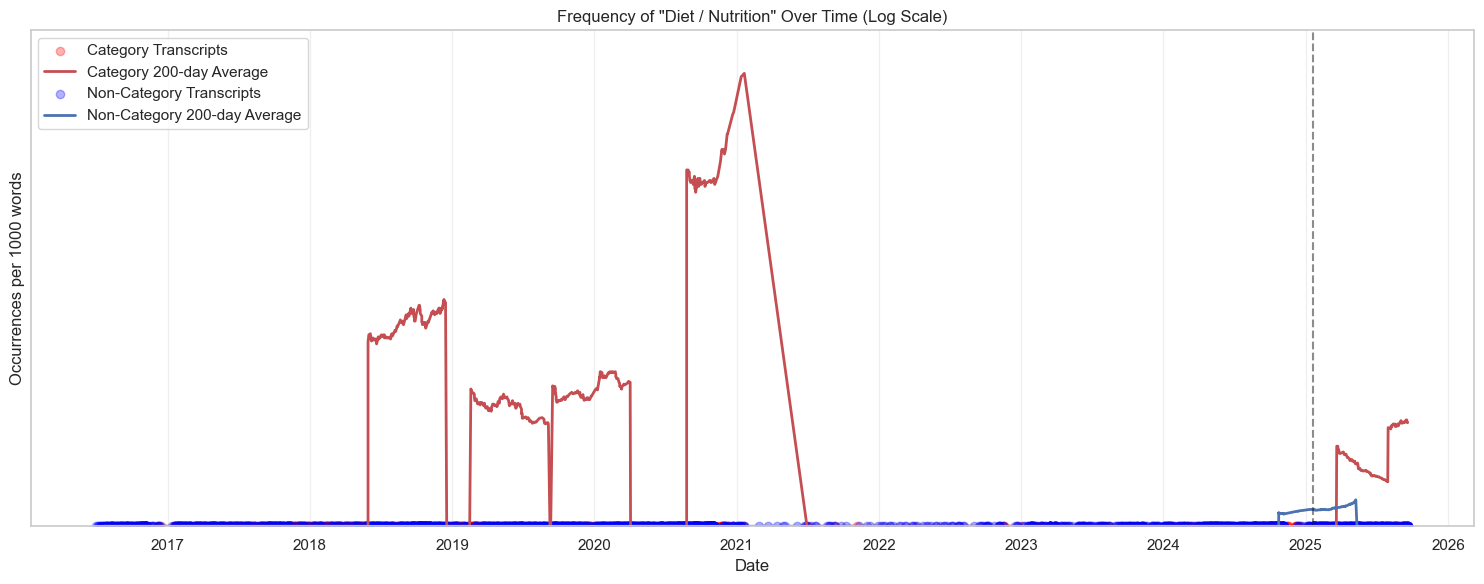


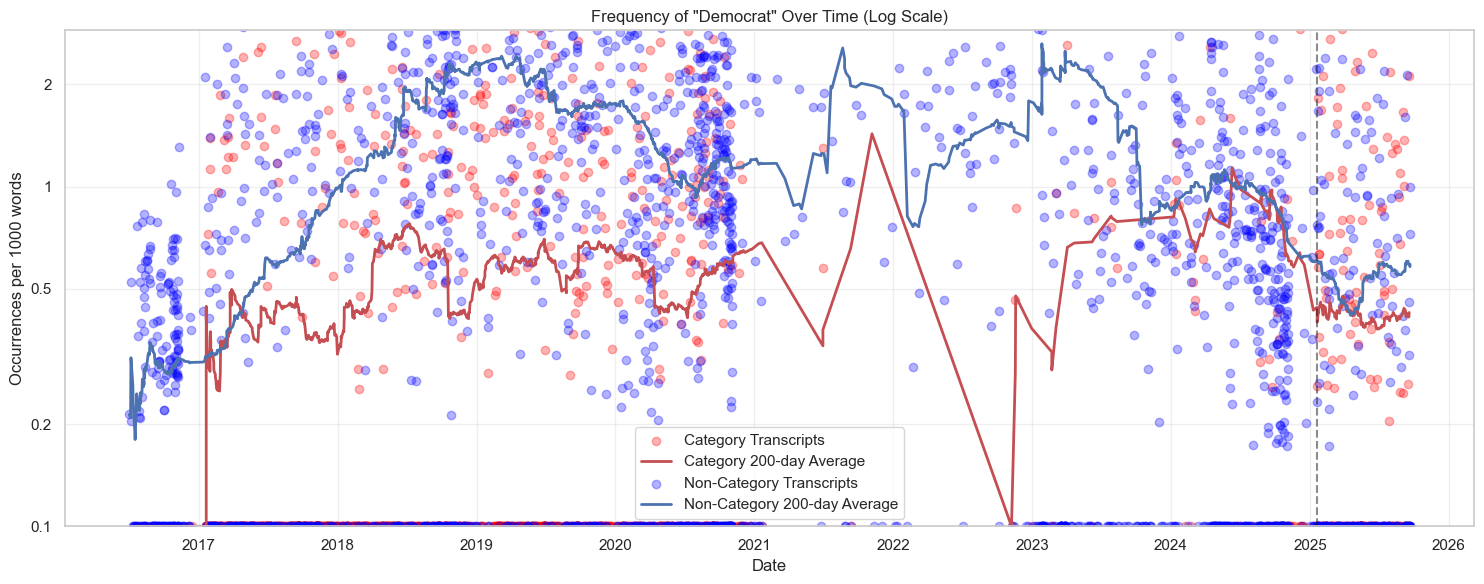


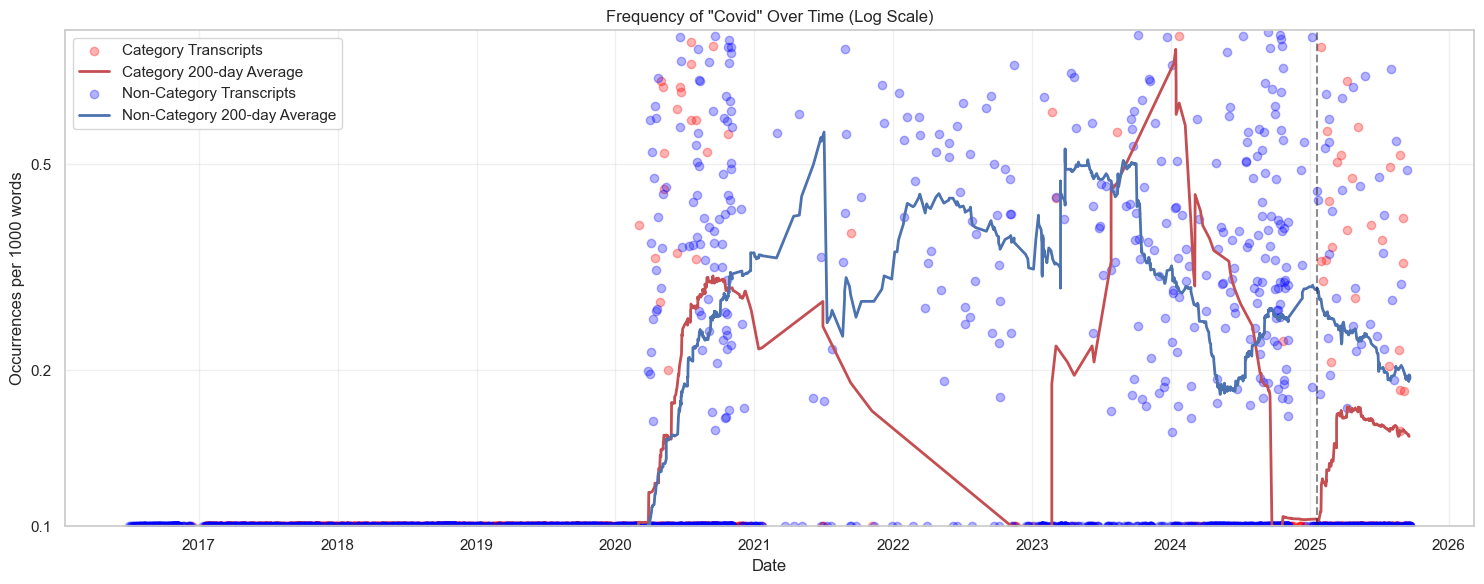


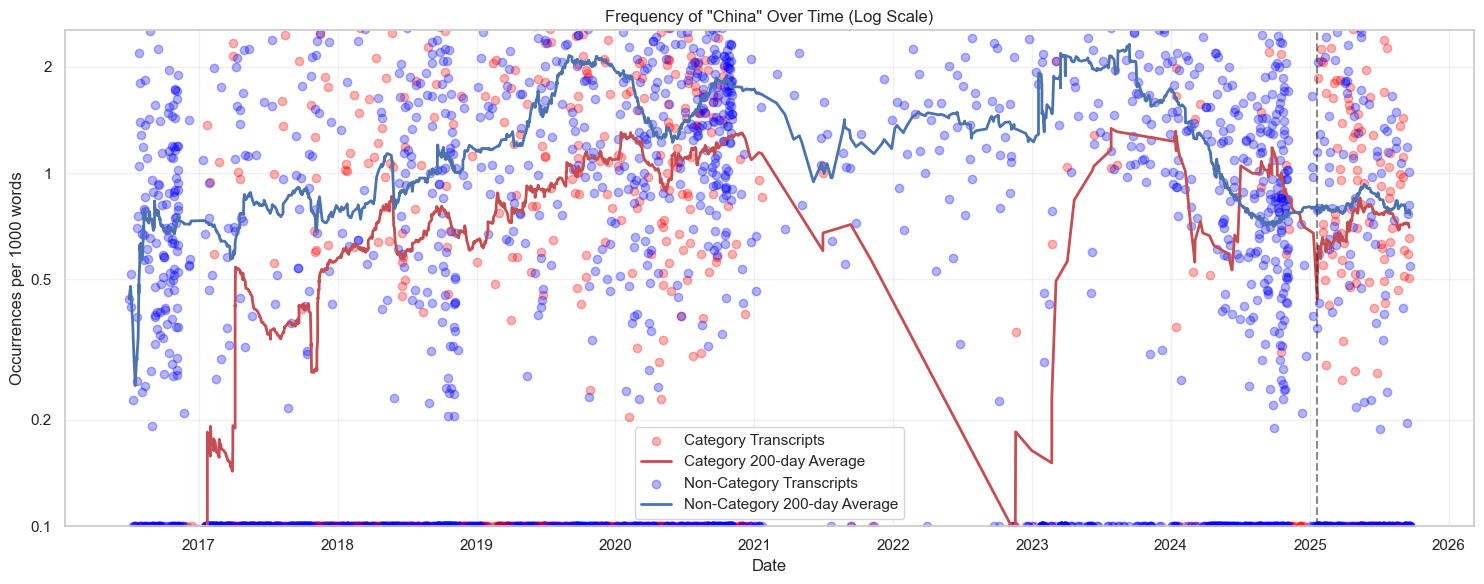


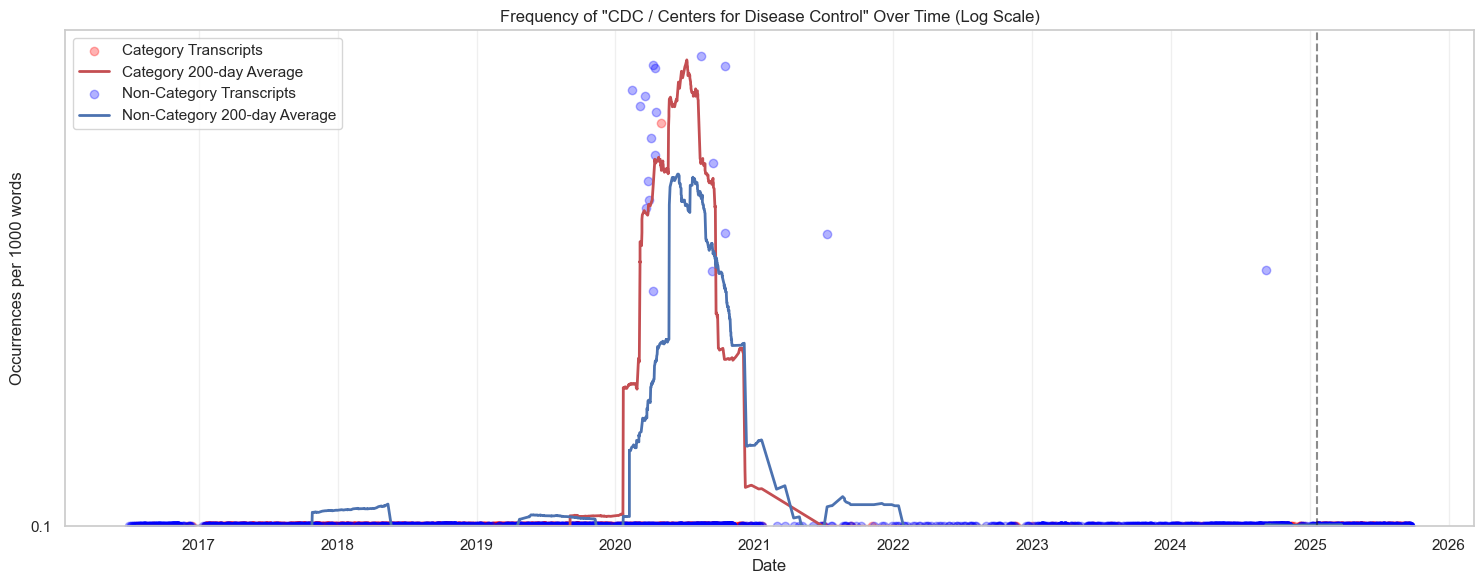


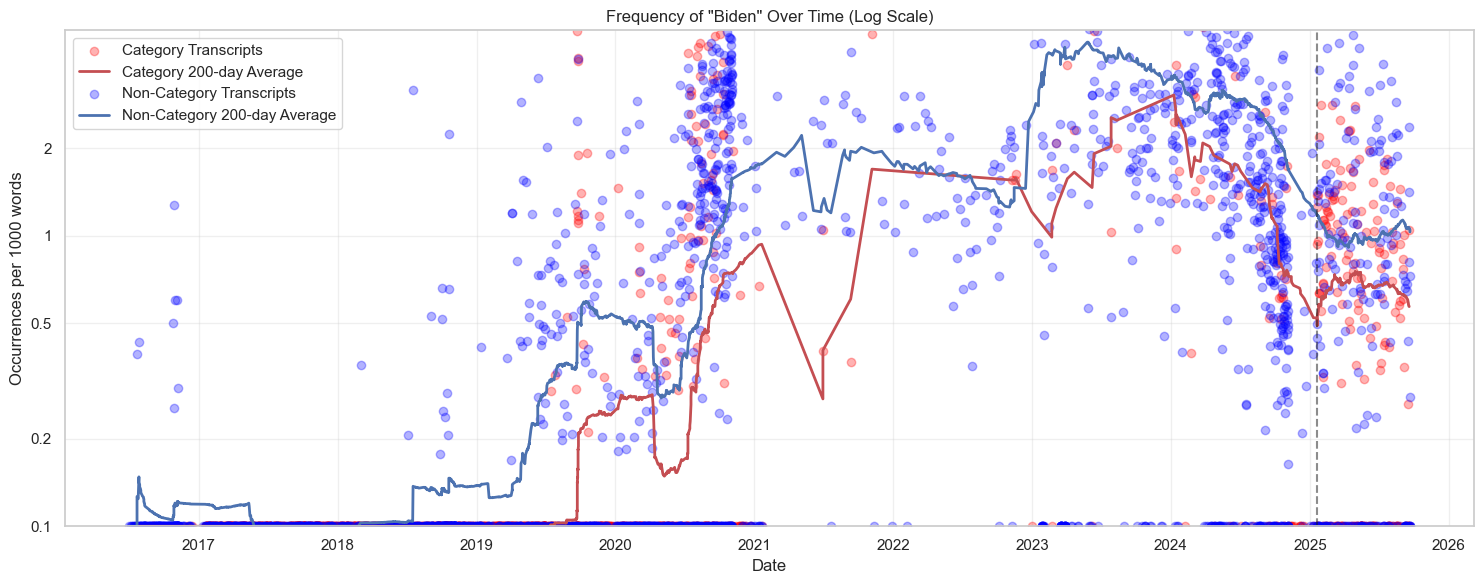

In [102]:

plot_phrase_frequency_over_time_all(df_category, df_non_category, SEARCH_PHRASES, log_scale=True, window=200)

In [105]:
# Find all files containing "announces" or "announcement" in the filename
announcement_files = df[df['file'].str.contains('announce', case=False, na=False)]

print(f"Files containing 'announce' or 'announcement' ({len(announcement_files)} total):")
print(announcement_files['file'].unique())


Files containing 'announce' or 'announcement' (45 total):
['2017-02-20_donald_trump_announces_hr_mcmaster_as_national_security_advisor.txt'
 '2017-03-31_donald_trump_announcement_with_the_national_association_of_manufacturers.txt'
 '2017-06-01_donald_trump_announces_withdrawal_from_paris_climate_accord.txt'
 '2017-06-05_donald_trump_announces_air_traffic_control_initiative.txt'
 '2017-07-20_donald_trump_at_pharmaceutical_glass_packaging_announcement.txt'
 '2017-07-26_donald_trump_foxconn_factory_announcement.txt'
 '2017-08-02_donald_trump_announces_new_immigration_reform_act.txt'
 '2017-11-02_donald_trump_announces_chairman_of_the_federal_reserve.txt'
 '2018-02-27_donald_trump_announces_initiative_on_historically_black_colleges.txt'
 '2018-03-13_donald_trump_announces_firing_of_rex_tillerson.txt'
 '2018-04-13_donald_trump_announces_missile_strikes_against_syria.txt'
 '2018-08-27_donald_trump_announces_new_united_states-mexico_trade_agreement.txt'
 '2018-08-29_donald_trump_announces_a_g

In [106]:
# Find all files containing "hhs" or "robert_f_kennedy" in the filename
hhs_files = df[df['file'].str.contains('hhs|robert_f_kennedy|drug|autism|vaccine|pharma', case=False, na=False)]

print(f"Files containing 'hhs' or 'robert_f_kennedy' ({len(hhs_files)} total):")
print(hhs_files['file'].unique())

Files containing 'hhs' or 'robert_f_kennedy' (20 total):
['2017-01-31_donald_trump_-_meeting_with_pharma.txt'
 '2017-07-20_donald_trump_at_pharmaceutical_glass_packaging_announcement.txt'
 '2017-10-26_donald_trump_on_combatting_drug_and_opioid_demand.txt'
 '2018-01-29_donald_trump_at_swearing_in_of_alex_azar_as_secretary_of_hhs.txt'
 '2018-05-11_donald_trump_delivers_remarks_on_pharmaceutical_prices.txt'
 '2018-08-29_donald_trump_announces_a_grant_for_drug-free_communities.txt'
 '2018-10-10_donald_trump_signs_drug_pricing_legislation_at_the_white_house.txt'
 '2018-10-25_donald_trump_discusses_drug_pricing_at_hhs.txt'
 '2018-10-26_drug_pricing.txt'
 '2019-03-13_donald_trump_receives_a_briefing_on_on_drug_trafficking.txt'
 '2019-04-24_donald_trump_addresses_the_rx_drug_abuse_and_heroin_summit_in_atlanta.txt'
 '2020-03-02_donald_trump_meets_with_pharmaceutical_executives_about_the_coronavirus.txt'
 '2020-05-15_donald_trump_delivers_an_update_on_coronavirus_vaccine_development.txt'
 '2020-

Expected length from category data: 2606 words


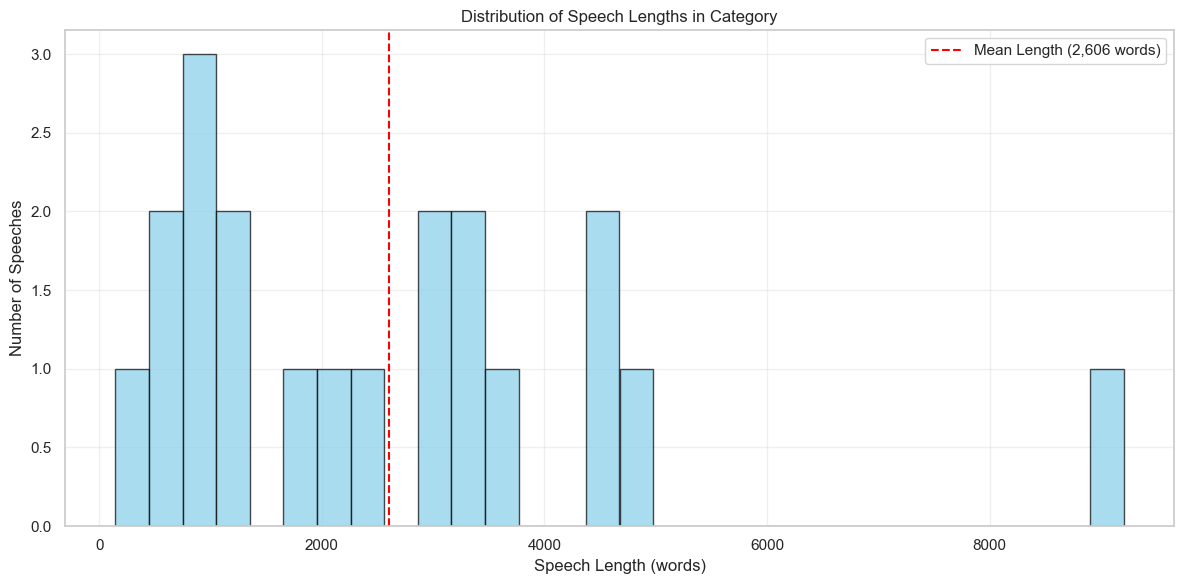

In [107]:
plot_length_distribution(hhs_files)

In [ ]:
# Find all appearances with Keir Starmer and analyze phrase occurrences
subset = df[df['file'] == '2025-09-10_message_on_the_murder_of_charlie_kirk.txt']
analyze_files_phrase_occurrences(subset, SEARCH_PHRASES)


## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [91]:
def calculate_poisson_predictions(df, avg_length):
    """Calculate predictions with likelihoods using Poisson distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Calculate rate per word
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in SOTU
        expected = rate_per_word * avg_length
        
        # Calculate likelihoods using Poisson PMF
        def poisson_ge_k(lambda_, k):
            return 1 - stats.poisson.cdf(k-1, lambda_)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Historical Rate': rate_per_word * 1000,  # per 1000 words
            'Total Historical': total_occurrences,
            'P(≥1)': poisson_ge_k(expected, 1),
            'P(≥3)': poisson_ge_k(expected, 3),
            'P(≥4)': poisson_ge_k(expected, 4),
            'P(≥5)': poisson_ge_k(expected, 5),
            'P(≥15)': poisson_ge_k(expected, 15)
        })
    
    return pd.DataFrame(predictions)

In [92]:


length = 600

# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, length)
predictions_speeches = calculate_poisson_predictions(df_category, length)
predictions_post_all = calculate_poisson_predictions(pd.concat([df_category_pre, df_category_post]), length)

# Format the tables
def format_prediction_table(df, source):
    formatted = df.copy()
    formatted = formatted.round(2)
    formatted['P(≥1)'] = formatted['P(≥1)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥3)'] = formatted['P(≥3)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥4)'] = formatted['P(≥4)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥5)'] = formatted['P(≥5)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥15)'] = formatted['P(≥15)'].apply(lambda x: f"{x:.1%}")
    
    return formatted[[
        'Phrase', 'Expected',
        'P(≥1)', 'P(≥3)', 'P(≥4)', 'P(≥5)', 'P(≥15)',
        'Historical Rate', 'Total Historical'
    ]].sort_values('Expected', ascending=False)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all, 'all'))

print("\nPredictions based on all speeches:")
display(format_prediction_table(predictions_speeches, 'post-inauguration-speeches'))

print("\nPredictions based on all post-inauguration appearances:")
display(format_prediction_table(predictions_post_all, 'post-inauguration-all'))

Predictions based on all appearances:


Phrase  Expected  P(≥1) P(≥3) P(≥4) P(≥5)  \
22                                China      0.67  49.0%  3.0%  0.0%  0.0%   
24                                Biden      0.56  43.0%  2.0%  0.0%  0.0%   
20                             Democrat      0.50  39.0%  1.0%  0.0%  0.0%   
7                            Republican      0.30  26.0%  0.0%  0.0%  0.0%   
4                               Vaccine      0.08   8.0%  0.0%  0.0%  0.0%   
21                                Covid      0.07   6.0%  0.0%  0.0%  0.0%   
15                     Lobby / Lobbyist      0.02   2.0%  0.0%  0.0%  0.0%   
1                        Charlie / Kirk      0.02   2.0%  0.0%  0.0%  0.0%   
8                          Prescription      0.02   2.0%  0.0%  0.0%  0.0%   
16                              Hottest      0.02   2.0%  0.0%  0.0%  0.0%   
18   FDA / Food and Drug Administration      0.01   1.0%  0.0%  0.0%  0.0%   
10                       Pharmaceutical      0.01   1.0%  0.0%  0.0%  0.0%   
6                                TikTok      0.01   1.0%  0.0%  0.0%  0.0%   
23    CDC / Centers for Disease Control      0.01   1.0%  0.0%  0.0%  0.0%   
3                            Warp Speed      0.01   1.0%  0.0%  0.0%  0.0%   
2                    Autopen / Auto Pen      0.01   1.0%  0.0%  0.0%  0.0%   
19                     Diet / Nutrition      0.00   0.0%  0.0%  0.0%  0.0%   
0                                Autism      0.00   0.0%  0.0%  0.0%  0.0%   
17                   Fitness / Exercise      0.00   0.0%  0.0%  0.0%  0.0%   
14    MAHA / Make America Healthy Again      0.00   0.0%  0.0%  0.0%  0.0%   
13  NIH / National Institutes of Health      0.00   0.0%  0.0%  0.0%  0.0%   
11                     PharmaPainkiller      0.00   0.0%  0.0%  0.0%  0.0%   
9                  Pregnant / Pregnancy      0.00   0.0%  0.0%  0.0%  0.0%   
5                               Tylenol      0.00   0.0%  0.0%  0.0%  0.0%   
12                     Over the Counter      0.00   0.0%  0.0%  0.0%  0.0%   

   P(≥15)  Historical Rate  Total Historical  
22   0.0%             1.12             13849  
24   0.0%             0.93             11566  
20   0.0%             0.83             10323  
7    0.0%             0.51              6258  
4    0.0%             0.13              1660  
21   0.0%             0.11              1371  
15   0.0%             0.03               338  
1    0.0%             0.03               433  
8    0.0%             0.03               364  
16   0.0%             0.03               401  
18   0.0%             0.02               303  
10   0.0%             0.02               217  
6    0.0%             0.02               248  
23   0.0%             0.01               105  
3    0.0%             0.01               110  
2    0.0%             0.01               163  
19   0.0%             0.00                 7  
0    0.0%             0.00                51  
17   0.0%             0.01                75  
14   0.0%             0.01                74  
13   0.0%             0.00                34  
11   0.0%             0.00                 0  
9    0.0%             0.00                40  
5    0.0%             0.00                 3  
12   0.0%             0.00                 2


Predictions based on all speeches:


Phrase  Expected  P(≥1) P(≥3) P(≥4) P(≥5)  \
22                                China      0.59  44.0%  2.0%  0.0%  0.0%   
20                             Democrat      0.34  29.0%  0.0%  0.0%  0.0%   
24                                Biden      0.26  23.0%  0.0%  0.0%  0.0%   
7                            Republican      0.17  16.0%  0.0%  0.0%  0.0%   
4                               Vaccine      0.08   8.0%  0.0%  0.0%  0.0%   
21                                Covid      0.03   3.0%  0.0%  0.0%  0.0%   
8                          Prescription      0.03   3.0%  0.0%  0.0%  0.0%   
16                              Hottest      0.03   3.0%  0.0%  0.0%  0.0%   
6                                TikTok      0.02   2.0%  0.0%  0.0%  0.0%   
18   FDA / Food and Drug Administration      0.02   2.0%  0.0%  0.0%  0.0%   
10                       Pharmaceutical      0.02   2.0%  0.0%  0.0%  0.0%   
1                        Charlie / Kirk      0.02   2.0%  0.0%  0.0%  0.0%   
2                    Autopen / Auto Pen      0.02   2.0%  0.0%  0.0%  0.0%   
23    CDC / Centers for Disease Control      0.01   1.0%  0.0%  0.0%  0.0%   
3                            Warp Speed      0.01   1.0%  0.0%  0.0%  0.0%   
15                     Lobby / Lobbyist      0.01   1.0%  0.0%  0.0%  0.0%   
19                     Diet / Nutrition      0.00   0.0%  0.0%  0.0%  0.0%   
0                                Autism      0.00   0.0%  0.0%  0.0%  0.0%   
17                   Fitness / Exercise      0.00   0.0%  0.0%  0.0%  0.0%   
14    MAHA / Make America Healthy Again      0.00   0.0%  0.0%  0.0%  0.0%   
13  NIH / National Institutes of Health      0.00   0.0%  0.0%  0.0%  0.0%   
11                     PharmaPainkiller      0.00   0.0%  0.0%  0.0%  0.0%   
9                  Pregnant / Pregnancy      0.00   0.0%  0.0%  0.0%  0.0%   
5                               Tylenol      0.00   0.0%  0.0%  0.0%  0.0%   
12                     Over the Counter      0.00   0.0%  0.0%  0.0%  0.0%   

   P(≥15)  Historical Rate  Total Historical  
22   0.0%             0.98              2709  
20   0.0%             0.56              1545  
24   0.0%             0.43              1200  
7    0.0%             0.28               786  
4    0.0%             0.14               375  
21   0.0%             0.05               148  
8    0.0%             0.04               118  
16   0.0%             0.04               124  
6    0.0%             0.03                79  
18   0.0%             0.03                71  
10   0.0%             0.03                85  
1    0.0%             0.03                71  
2    0.0%             0.03                87  
23   0.0%             0.01                34  
3    0.0%             0.01                36  
15   0.0%             0.01                33  
19   0.0%             0.00                 6  
0    0.0%             0.00                12  
17   0.0%             0.01                20  
14   0.0%             0.00                11  
13   0.0%             0.01                15  
11   0.0%             0.00                 0  
9    0.0%             0.00                12  
5    0.0%             0.00                 0  
12   0.0%             0.00                 2


Predictions based on all post-inauguration appearances:


Phrase  Expected  P(≥1) P(≥3) P(≥4) P(≥5)  \
22                                China      0.59  44.0%  2.0%  0.0%  0.0%   
20                             Democrat      0.34  29.0%  0.0%  0.0%  0.0%   
24                                Biden      0.26  23.0%  0.0%  0.0%  0.0%   
7                            Republican      0.17  16.0%  0.0%  0.0%  0.0%   
4                               Vaccine      0.08   8.0%  0.0%  0.0%  0.0%   
21                                Covid      0.03   3.0%  0.0%  0.0%  0.0%   
8                          Prescription      0.03   3.0%  0.0%  0.0%  0.0%   
16                              Hottest      0.03   3.0%  0.0%  0.0%  0.0%   
6                                TikTok      0.02   2.0%  0.0%  0.0%  0.0%   
18   FDA / Food and Drug Administration      0.02   2.0%  0.0%  0.0%  0.0%   
10                       Pharmaceutical      0.02   2.0%  0.0%  0.0%  0.0%   
1                        Charlie / Kirk      0.02   2.0%  0.0%  0.0%  0.0%   
2                    Autopen / Auto Pen      0.02   2.0%  0.0%  0.0%  0.0%   
23    CDC / Centers for Disease Control      0.01   1.0%  0.0%  0.0%  0.0%   
3                            Warp Speed      0.01   1.0%  0.0%  0.0%  0.0%   
15                     Lobby / Lobbyist      0.01   1.0%  0.0%  0.0%  0.0%   
19                     Diet / Nutrition      0.00   0.0%  0.0%  0.0%  0.0%   
0                                Autism      0.00   0.0%  0.0%  0.0%  0.0%   
17                   Fitness / Exercise      0.00   0.0%  0.0%  0.0%  0.0%   
14    MAHA / Make America Healthy Again      0.00   0.0%  0.0%  0.0%  0.0%   
13  NIH / National Institutes of Health      0.00   0.0%  0.0%  0.0%  0.0%   
11                     PharmaPainkiller      0.00   0.0%  0.0%  0.0%  0.0%   
9                  Pregnant / Pregnancy      0.00   0.0%  0.0%  0.0%  0.0%   
5                               Tylenol      0.00   0.0%  0.0%  0.0%  0.0%   
12                     Over the Counter      0.00   0.0%  0.0%  0.0%  0.0%   

   P(≥15)  Historical Rate  Total Historical  
22   0.0%             0.98              2709  
20   0.0%             0.56              1545  
24   0.0%             0.43              1200  
7    0.0%             0.28               786  
4    0.0%             0.14               375  
21   0.0%             0.05               148  
8    0.0%             0.04               118  
16   0.0%             0.04               124  
6    0.0%             0.03                79  
18   0.0%             0.03                71  
10   0.0%             0.03                85  
1    0.0%             0.03                71  
2    0.0%             0.03                87  
23   0.0%             0.01                34  
3    0.0%             0.01                36  
15   0.0%             0.01                33  
19   0.0%             0.00                 6  
0    0.0%             0.00                12  
17   0.0%             0.01                20  
14   0.0%             0.00                11  
13   0.0%             0.01                15  
11   0.0%             0.00                 0  
9    0.0%             0.00                12  
5    0.0%             0.00                 0  
12   0.0%             0.00                 2

## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [93]:
foreign_engagements = ['2024-07-26_donald_trump_meets_with_benjamin_netanyahu_of_israel_at_mar-a-lago.txt',
'2024-12-07_donald_trump_meets_with_emmanuel_macron_of_france_in_paris.txt',
'2024-12-07_donald_trump_meets_with_william_prince_of_wales_in_paris.txt',
'2025-02-04_donald_trump_holds_a_presser_with_benjamin_netanyahu_of_israel.txt',
'2025-02-04_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-02-07_donald_trump_holds_a_bilateral_meeting_with_shigeru_ishiba_of_japan.txt',
'2025-02-11_donald_trump_holds_a_bilateral_meeting_with_king_abdullah_ii_of_jordan.txt',
'2025-02-13_donald_trump_holds_a_bilateral_meeting_with_narendra_modi_of_india.txt',
'2025-02-24_donald_trump_holds_a_bilateral_meeting_with_emmanuel_macron_of_france.txt',
'2025-02-27_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-02-28_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-03-12_donald_trump_holds_a_bilateral_meeting_with_micheál_martin_of_ireland.txt',
'2025-03-13_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-04-07_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-04-14_donald_trump_holds_a_bilateral_meeting_with_nayib_bukele_of_el_salvador.txt',
'2025-04-17_donald_trump_holds_a_bilat_with_giorgia_meloni_of_italy.txt',
'2025-04-24_donald_trump_holds_a_bilateral_lunch_with_jonas_gahr_støre_of_norway.txt',
'2025-04-24_donald_trump_holds_a_bilateral_meeting_with_jonas_gahr_støre_of_norway.txt',
'2025-05-06_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada.txt',
'2025-05-15_donald_trump_holds_a_bilat_with_sheikh_al_nahyan_in_abu_dhabi.txt',
'2025-05-21_donald_trump_holds_a_bilat_with_cyril_ramaphosa_of_south_africa.txt',
'2025-06-05_donald_trump_holds_a_bilat_with_friedrich_merz_of_germany.txt',
'2025-06-05_donald_trump_welcomes_friedrich_merz_of_germany_to_the_white_house.txt',
'2025-06-16_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-06-16_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada_at_the_g7.txt',
'2025-06-25_donald_trump_holds_a_pull-aside_bilat_with_mark_rutte_of_nato.txt',
'2025-06-25_donald_trump_holds_a_bilat_with_dick_schoof_of_the_netherlands.txt',
'2025-06-27_donald_trump_meets_with_foreign_ministers_from_drc_and_rwanda.txt',
'2025-07-07_donald_trump_holds_a_bilateral_dinner_with_benjamin_netanyahu_of_israel.txt',
'2025-07-09_donald_trump_meets_with_the_leaders_of_five_african_nations_over_lunch.txt',
'2025-07-14_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-07-16_donald_trump_holds_a_bilat_with_salman_bin_hamad_al_khalifa_of_bahrain.txt',
'2025-07-22_donald_trump_welcomes_bongbong_marcos_to_the_white_house.txt',
'2025-07-22_donald_trump_holds_a_bilat_with_bongbong_marcos_of_the_philippines.txt',
'2025-07-27_donald_trump_holds_a_bilateral_meeting_with_ursula_von_der_leyen_of_the_eu.txt',
'2025-07-28_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-07-28_donald_trump_welcomes_keir_starmer_of_the_united_kingdom_to_trump_turnberry.txt',
'2025-08-08_donald_trump_welcomes_nikol_pashinyan_of_armenia_to_the_white_house.txt',
'2025-08-08_donald_trump_welcomes_ilham_aliyev_of_azerbaijan_to_the_white_house.txt',
'2025-08-15_donald_trump_holds_a_bilateral_meeting_with_vladimir_putin_of_russia.txt',
'2025-08-18_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-08-18_donald_trump_meets_with_european_leaders_on_ukraine.txt',
'2025-08-18_donald_trump_welcomes_volodymyr_zelenskyy_to_the_white_house.txt']

In [110]:
from scipy import stats
import pandas as pd
import numpy as np

def calculate_negative_binomial_predictions(df, avg_length):
    """Calculate predictions using Negative Binomial distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Skip phrases that don't exist in the dataframe
        if phrase not in df.columns:
            continue
            
        # Calculate rate per word and variance
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in speech of avg_length
        expected = rate_per_word * avg_length
        
        # Calculate sample variance to estimate overdispersion
        counts_per_speech = df[phrase] / df['text_length'] * avg_length
        sample_variance = counts_per_speech.var()
        
        if sample_variance > expected and expected > 0:  # Check for overdispersion
            # Calculate r parameter for negative binomial using method of moments
            r = max(0.1, expected**2 / (sample_variance - expected))
            p = r/(r + expected)
        else:
            # If no overdispersion, fallback to quasi-Poisson
            r = 100
            p = r/(r + expected)
        
        # Calculate likelihoods using Negative Binomial CDF
        def nb_ge_k(r, p, k):
            return 1 - stats.nbinom.cdf(k-1, r, p)
        
        predictions.append({
            'Phrase': phrase,
            'Rate per 1000 words': rate_per_word * 1000,
            'Expected': expected,
            'Dispersion (r)': r,
            'Sample Variance': sample_variance,
            'P(≥1)': nb_ge_k(r, p, 1)
        })
    
    return pd.DataFrame(predictions)


def format_prediction_table(df):
    """Format prediction table with percentages"""
    formatted = df.copy()
    formatted = formatted.round(3)
    
    # Format probability columns as percentages
    formatted['P(≥1)'] = formatted['P(≥1)'].map('{:.1%}'.format)
    
    # Round other numeric columns
    formatted['Expected'] = formatted['Expected'].round(2)
    if 'Dispersion (r)' in formatted.columns:
        formatted['Dispersion (r)'] = formatted['Dispersion (r)'].round(2)
        formatted['Sample Variance'] = formatted['Sample Variance'].round(2)
    
    return formatted.sort_values('Expected', ascending=False)

def compare_models(poisson_df, nb_df):
    """Compare Poisson and Negative Binomial predictions"""
    comparison = pd.DataFrame()
    comparison['Phrase'] = poisson_df['Phrase']
    comparison['Expected'] = poisson_df['Expected']
    
    # Convert percentage strings back to floats for calculations
    comparison['Poisson P(≥1)'] = poisson_df['P(≥1)'].astype(float)
    comparison['NB P(≥1)'] = nb_df['P(≥1)'].astype(float)
    comparison['Δ P(≥1)'] = (comparison['NB P(≥1)'] - comparison['Poisson P(≥1)']) * 100
    
    comparison['Dispersion (r)'] = nb_df['Dispersion (r)']
    comparison['Sample Variance'] = nb_df['Sample Variance']
    
    # Format probability columns as percentages
    comparison['Poisson P(≥1)'] = comparison['Poisson P(≥1)'].map('{:.1%}'.format)
    comparison['NB P(≥1)'] = comparison['NB P(≥1)'].map('{:.1%}'.format)
    
    return comparison.round(3).sort_values('Δ P(≥1)', ascending=True)

def plot_distribution_comparison(phrase, poisson_df, nb_df, max_k=10):
    """Plot comparison of Poisson and Negative Binomial distributions"""
    phrase_data = poisson_df[poisson_df['Phrase'] == phrase].iloc[0]
    nb_data = nb_df[nb_df['Phrase'] == phrase].iloc[0]
    
    lambda_ = phrase_data['Expected']
    r = nb_data['Dispersion (r)']
    p = r/(r + lambda_)
    
    k = np.arange(0, max_k+1)
    poisson_pmf = stats.poisson.pmf(k, lambda_)
    nb_pmf = stats.nbinom.pmf(k, r, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k-0.2, poisson_pmf, width=0.4, alpha=0.5, label='Poisson', color='blue')
    plt.bar(k+0.2, nb_pmf, width=0.4, alpha=0.5, label='Negative Binomial', color='red')
    plt.title(f'Distribution Comparison for "{phrase}"')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Calculate predictions using both models
avg_speech_length = df_category['text_length'].mean()
avg_speech_length = 8000
print(f"Avg speech length: {avg_speech_length:.0f} words")

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on category:")
nb_predictions = calculate_negative_binomial_predictions(df_category, avg_speech_length)
display(format_prediction_table(nb_predictions))

# # Filter for foreign engagements only
# df_foreign = df[df['file'].isin(foreign_engagements)]
# print("Negative Binomial Predictions based on foreign engagements only:")
# nb_predictions_foreign = calculate_negative_binomial_predictions(df_foreign, avg_speech_length)
# display(format_prediction_table(nb_predictions_foreign))

print("Negative Binomial Predictions based on all appearances post inauguration:")
nb_predictions_all = calculate_negative_binomial_predictions(df_post, avg_speech_length)
display(format_prediction_table(nb_predictions_all))

poisson_predictions = calculate_poisson_predictions(df_category_post, avg_speech_length)

print("\nModel Comparison (Negative Binomial vs Poisson):")
display(compare_models(poisson_predictions, nb_predictions))

# Plot distributions for most overdispersed phrases - only use phrases that exist in the data
available_phrases = ['Border', 'America', 'God', 'Rigged', 'Hell']
most_overdispersed = nb_predictions[nb_predictions['Phrase'].isin(available_phrases)]
for _, row in most_overdispersed.iterrows():
    # Get parameters for both distributions
    phrase_data = poisson_predictions[poisson_predictions['Phrase'] == row['Phrase']].iloc[0]
    lambda_ = phrase_data['Expected']
    r = row['Dispersion (r)']
    p = r/(r + lambda_)
    
    # Find where probability becomes negligible (< 0.1%)
    k = 0
    while stats.nbinom.pmf(k, r, p) > 0.001 or stats.poisson.pmf(k, lambda_) > 0.001:
        k += 1
    
    # Ensure minimum k of 30 for 'America' to show full distribution
    if row['Phrase'] == 'America':
        k = max(k, 60)
    
    print(f"\nDistribution comparison for {row['Phrase']} (r = {row['Dispersion (r)']:.2f}):")
    plot_distribution_comparison(row['Phrase'], poisson_predictions, nb_predictions, max_k=k)

Avg speech length: 8000 words
Negative Binomial Predictions based on all appearances:


Phrase  Rate per 1000 words  Expected  \
23                                China                1.119      8.95   
25                                Biden                0.934      7.48   
21                             Democrat                0.834      6.67   
7                            Republican                0.506      4.04   
4                               Vaccine                0.134      1.07   
22                                Covid                0.111      0.89   
1                        Charlie / Kirk                0.035      0.28   
17                              Hottest                0.032      0.26   
8                          Prescription                0.029      0.24   
16                     Lobby / Lobbyist                0.027      0.22   
19   FDA / Food and Drug Administration                0.024      0.20   
6                                TikTok                0.020      0.16   
10                       Pharmaceutical                0.018      0.14   
2                    Autopen / Auto Pen                0.013      0.10   
11                               Pharma                0.010      0.08   
3                            Warp Speed                0.009      0.07   
24    CDC / Centers for Disease Control                0.008      0.07   
15    MAHA / Make America Healthy Again                0.006      0.05   
18                   Fitness / Exercise                0.006      0.05   
0                                Autism                0.004      0.03   
9                  Pregnant / Pregnancy                0.003      0.03   
14  NIH / National Institutes of Health                0.003      0.02   
12                           Painkiller                0.002      0.02   
20                     Diet / Nutrition                0.001      0.00   
5                               Tylenol                0.000      0.00   
13                     Over the Counter                0.000      0.00   

    Dispersion (r)  Sample Variance  P(≥1)  
23            0.39           214.79  71.0%  
25            0.24           239.86  56.6%  
21            0.21           214.78  52.4%  
7             0.10           167.92  31.1%  
4             0.10            35.99  21.8%  
22            0.10            10.66  20.5%  
1             0.10            56.71  12.5%  
17            0.10             2.31  12.0%  
8             0.10             8.28  11.4%  
16            0.10             0.98  10.9%  
19            0.10             2.13  10.3%  
6             0.10             5.54   9.1%  
10            0.10             4.58   8.4%  
2             0.10             1.18   6.9%  
11            0.10             5.70   5.9%  
3             0.10             0.67   5.2%  
24            0.10             2.11   5.0%  
15            0.10             0.10   3.8%  
18            0.10             0.28   3.9%  
0             0.10             1.35   2.8%  
9             0.10             0.23   2.3%  
14            0.10             0.46   2.0%  
12            0.10             0.31   1.5%  
20            0.10             0.05   0.4%  
5             0.10             0.23   0.2%  
13            0.10             0.03   0.1%

Negative Binomial Predictions based on category:


Phrase  Rate per 1000 words  Expected  \
23                                China                0.980      7.84   
21                             Democrat                0.559      4.47   
25                                Biden                0.434      3.47   
7                            Republican                0.284      2.28   
4                               Vaccine                0.136      1.09   
22                                Covid                0.054      0.43   
17                              Hottest                0.045      0.36   
8                          Prescription                0.043      0.34   
10                       Pharmaceutical                0.031      0.25   
2                    Autopen / Auto Pen                0.031      0.25   
6                                TikTok                0.029      0.23   
1                        Charlie / Kirk                0.026      0.21   
19   FDA / Food and Drug Administration                0.026      0.21   
3                            Warp Speed                0.013      0.10   
24    CDC / Centers for Disease Control                0.012      0.10   
16                     Lobby / Lobbyist                0.012      0.10   
11                               Pharma                0.008      0.07   
18                   Fitness / Exercise                0.007      0.06   
0                                Autism                0.004      0.04   
14  NIH / National Institutes of Health                0.005      0.04   
12                           Painkiller                0.005      0.04   
9                  Pregnant / Pregnancy                0.004      0.04   
15    MAHA / Make America Healthy Again                0.004      0.03   
20                     Diet / Nutrition                0.002      0.02   
13                     Over the Counter                0.001      0.01   
5                               Tylenol                0.000      0.00   

    Dispersion (r)  Sample Variance  P(≥1)  
23            0.37           174.50  68.2%  
21            0.27            79.67  53.5%  
25            0.45            30.18  62.4%  
7             0.10           179.43  27.2%  
4             0.10            20.78  21.9%  
22            0.10             2.94  15.3%  
17            0.10             2.12  14.1%  
8             0.10             3.94  13.8%  
10            0.10             1.74  11.7%  
2             0.10             1.26  11.8%  
6             0.10             1.05  11.2%  
1             0.10            71.25  10.6%  
19            0.10             2.77  10.6%  
3             0.10             0.51   6.9%  
24            0.10             2.59   6.6%  
16            0.10             0.39   6.5%  
11            0.10             0.55   5.0%  
18            0.10             0.32   4.5%  
0             0.10             0.30   2.9%  
14            0.10             0.36   3.5%  
12            0.10             0.30   3.1%  
9             0.10             0.26   2.9%  
15            0.10             0.22   2.7%  
20            0.10             0.11   1.6%  
13            0.10             0.07   0.6%  
5           100.00             0.00   0.0%

Negative Binomial Predictions based on all appearances post inauguration:


Phrase  Rate per 1000 words  Expected  \
23                                China                0.829      6.63   
25                                Biden                0.811      6.49   
21                             Democrat                0.489      3.91   
7                            Republican                0.297      2.38   
1                        Charlie / Kirk                0.155      1.24   
17                              Hottest                0.138      1.10   
2                    Autopen / Auto Pen                0.122      0.98   
6                                TikTok                0.107      0.86   
22                                Covid                0.085      0.68   
10                       Pharmaceutical                0.076      0.60   
0                                Autism                0.023      0.18   
16                     Lobby / Lobbyist                0.021      0.17   
15    MAHA / Make America Healthy Again                0.014      0.12   
4                               Vaccine                0.015      0.12   
8                          Prescription                0.010      0.08   
18                   Fitness / Exercise                0.009      0.07   
11                               Pharma                0.008      0.06   
19   FDA / Food and Drug Administration                0.005      0.04   
3                            Warp Speed                0.004      0.03   
9                  Pregnant / Pregnancy                0.003      0.02   
14  NIH / National Institutes of Health                0.002      0.02   
12                           Painkiller                0.001      0.01   
20                     Diet / Nutrition                0.002      0.01   
5                               Tylenol                0.000      0.00   
24    CDC / Centers for Disease Control                0.000      0.00   
13                     Over the Counter                0.000      0.00   

    Dispersion (r)  Sample Variance  P(≥1)  
23            0.74            66.32  81.6%  
25            0.90            53.53  84.9%  
21            0.47            36.33  65.1%  
7             0.52            13.14  59.3%  
1             0.10           257.31  22.9%  
17            0.10            14.71  22.0%  
2             0.10            10.46  21.3%  
6             0.10            10.43  20.2%  
22            0.11             5.02  19.1%  
10            0.10            28.96  17.7%  
0             0.10             9.70   9.8%  
16            0.11             0.43   9.7%  
15            0.10             0.84   7.4%  
4             0.10             0.60   7.6%  
8           100.00             0.06   7.6%  
18            0.10             0.38   5.3%  
11            0.10             0.23   4.6%  
19            0.10             0.24   3.0%  
3             0.10             0.04   2.6%  
9             0.10             0.61   2.1%  
14            0.10             0.21   1.7%  
12            0.10             0.02   0.6%  
20          100.00             0.01   1.2%  
5           100.00             0.00   0.0%  
24          100.00             0.00   0.0%  
13          100.00             0.00   0.0%


Model Comparison (Negative Binomial vs Poisson):


Phrase  Expected Poisson P(≥1) NB P(≥1)  \
7                            Republican     1.707         81.9%    27.2%   
2                    Autopen / Auto Pen     1.076         65.9%    11.8%   
17                              Hottest     1.113         67.2%    14.1%   
6                                TikTok     0.916         60.0%    11.2%   
21                             Democrat     3.452         96.8%    53.5%   
25                                Biden     5.926         99.7%    62.4%   
10                       Pharmaceutical     0.594         44.8%    11.7%   
23                                China     7.052         99.9%    68.2%   
22                                Covid     0.606         45.5%    15.3%   
1                        Charlie / Kirk     0.346         29.3%    10.6%   
15    MAHA / Make America Healthy Again     0.124         11.6%     2.7%   
0                                Autism     0.111         10.5%     2.9%   
18                   Fitness / Exercise     0.099          9.4%     4.5%   
16                     Lobby / Lobbyist     0.087          8.3%     6.5%   
20                     Diet / Nutrition     0.025          2.4%     1.6%   
5                               Tylenol     0.000          0.0%     0.0%   
9                  Pregnant / Pregnancy     0.025          2.4%     2.9%   
13                     Over the Counter     0.000          0.0%     0.6%   
14  NIH / National Institutes of Health     0.025          2.4%     3.5%   
12                           Painkiller     0.012          1.2%     3.1%   
3                            Warp Speed     0.037          3.6%     6.9%   
11                               Pharma     0.000          0.0%     5.0%   
8                          Prescription     0.087          8.3%    13.8%   
19   FDA / Food and Drug Administration     0.049          4.8%    10.6%   
24    CDC / Centers for Disease Control     0.000          0.0%     6.6%   
4                               Vaccine     0.099          9.4%    21.9%   

    Δ P(≥1)  Dispersion (r)  Sample Variance  
7   -54.713           0.100          179.430  
2   -54.094           0.100            1.265  
17  -53.023           0.100            2.121  
6   -48.749           0.100            1.048  
21  -43.304           0.266           79.673  
25  -37.370           0.452           30.178  
10  -33.104           0.100            1.735  
23  -31.731           0.369          174.501  
22  -30.122           0.100            2.941  
1   -18.709           0.100           71.254  
15   -8.910           0.100            0.221  
0    -7.599           0.100            0.296  
18   -4.958           0.100            0.323  
16   -1.810           0.100            0.389  
20   -0.855           0.100            0.113  
5     0.000         100.000            0.000  
9     0.494           0.100            0.260  
13    0.561           0.100            0.070  
14    1.098           0.100            0.358  
12    1.915           0.100            0.303  
3     3.248           0.100            0.507  
11    4.976           0.100            0.551  
8     5.507           0.100            3.945  
19    5.740           0.100            2.772  
24    6.624           0.100            2.591  
4    12.486           0.100           20.780

## Recent Usage in context

In [109]:
get_recent_contexts_all(df, SEARCH_PHRASES, n=20)


=== Recent usage of 'Autism' ===

Date: 2025-09-21 (speech)
Context: ...y medically, I think, in the history of our country.

We're gonna be doing it with Bobby and Oz and all of the professionals. I think you're gonna find it to be amazing. I think we found an answer to autism. How about that? Autism. Tomorrow, we're gonna be talking in the Oval Office, in the White House about autism, how it happens, so we won't let it happen anymore.

And how to get at least somewhat bett...

Date: 2025-09-21 (speech)
Context: ... the history of our country.

We're gonna be doing it with Bobby and Oz and all of the professionals. I think you're gonna find it to be amazing. I think we found an answer to autism. How about that? Autism. Tomorrow, we're gonna be talking in the Oval Office, in the White House about autism, how it happens, so we won't let it happen anymore.

And how to get at least somewhat better when you have it, so ...

Date: 2025-09-21 (speech)
Context: ... professionals. I think you

## Per-Speech Frequencies


In [111]:
from src.phrase_analysis import get_per_appearance_frequency
get_per_appearance_frequency({'all': df, CATEGORY_OF_INTEREST: df_category, f'{CATEGORY_OF_INTEREST} since inauguration': df_category_post, f'{CATEGORY_OF_INTEREST} over 5000 words': df_category[df_category['text_length'] > 5000], 'announcements': announcement_files, 'hhs': hhs_files}, SEARCH_PHRASES)

Percentage of Appearances Containing Each Phrase:


foreign leader meeting keywords:
welcomes, greets, bilat, bilateral, meets,


In [97]:
# Filter for foreign leader meetings based on filename keywords
foreign_leader_keywords = ['welcomes', 'greets', 'bilat', 'bilateral', 'meets']

# Get all transcripts with filenames containing foreign leader keywords
foreign_leader_df = df[df['file'].str.contains('|'.join(foreign_leader_keywords), case=False, na=False)]

print(f"Found {len(foreign_leader_df)} foreign leader meeting transcripts:")
print("\nForeign Leader Meeting Transcripts:")
for idx, row in foreign_leader_df.iterrows():
    print(f"Date: {row['date'].strftime('%Y-%m-%d')} - {row['file']}")
    print(f"Category: {row['category']}")
    print()

# Filter for press conference transcripts based on filename keywords
press_conference_keywords = ['press_conference', 'presser', 'news_conference']

# Get all transcripts with filenames containing press conference keywords
press_conference_df = df[df['file'].str.contains('|'.join(press_conference_keywords), case=False, na=False)]

print(f"Found {len(press_conference_df)} press conference transcripts:")
print("\nPress Conference Transcripts:")
for idx, row in press_conference_df.iterrows():
    print(f"Date: {row['date'].strftime('%Y-%m-%d')} - {row['file']}")
    print(f"Category: {row['category']}")
    print()

# Combine foreign leader meetings and press conferences
combined_df = pd.concat([foreign_leader_df, press_conference_df]).drop_duplicates()

print(f"\nCombined list ({len(combined_df)} total transcripts):")
print("=" * 80)
for idx, row in combined_df.sort_values('date').iterrows():
    print(f"'{row['file']}',")



Found 367 foreign leader meeting transcripts:

Foreign Leader Meeting Transcripts:
Date: 2016-12-14 - 2016-12-14_donald_trump_meets_with_technology_leaders.txt
Category: remarks

Date: 2017-03-17 - 2017-03-17_donald_trump_meets_with_republican_study_commission.txt
Category: remarks

Date: 2017-03-20 - 2017-03-20_donald_trump_at_bilateral_meeting_with_iraqi_prime_minister.txt
Category: remarks

Date: 2017-03-24 - 2017-03-24_donald_trump_meets_with_tom_rutledge_charter_communication_ceo.txt
Category: remarks

Date: 2017-03-30 - 2017-03-30_donald_trump_meets_with_prime_minister_of_denmark.txt
Category: remarks

Date: 2017-04-03 - 2017-04-03_donald_trump_meets_with_egyptian_president_al-sisi.txt
Category: remarks

Date: 2017-04-05 - 2017-04-05_donald_trump_meets_with_king_abdullah_ii.txt
Category: remarks

Date: 2017-04-07 - 2017-04-07_donald_trump_at_bilateral_meeting_with_xi_jinping.txt
Category: remarks

Date: 2017-04-13 - 2017-04-13_donald_trump_meets_with_i-85_first_responders.txt
Cat

In [98]:
foreign_engagements = ['2024-07-26_donald_trump_meets_with_benjamin_netanyahu_of_israel_at_mar-a-lago.txt',
'2024-12-07_donald_trump_meets_with_emmanuel_macron_of_france_in_paris.txt',
'2024-12-07_donald_trump_meets_with_william_prince_of_wales_in_paris.txt',
'2025-02-04_donald_trump_holds_a_presser_with_benjamin_netanyahu_of_israel.txt',
'2025-02-04_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-02-07_donald_trump_holds_a_bilateral_meeting_with_shigeru_ishiba_of_japan.txt',
'2025-02-11_donald_trump_holds_a_bilateral_meeting_with_king_abdullah_ii_of_jordan.txt',
'2025-02-11_donald_trump_greets_marc_fogel_after_his_release_from_russia.txt',
'2025-02-13_donald_trump_holds_a_bilateral_meeting_with_narendra_modi_of_india.txt',
'2025-02-24_donald_trump_holds_a_bilateral_meeting_with_emmanuel_macron_of_france.txt',
'2025-02-27_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-02-28_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-03-12_donald_trump_holds_a_bilateral_meeting_with_micheál_martin_of_ireland.txt',
'2025-03-13_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-03-25_donald_trump_meets_with_us_ambassadors_at_the_white_house.txt',
'2025-04-07_donald_trump_holds_a_bilat_with_benjamin_netanyahu_of_israel.txt',
'2025-04-14_donald_trump_holds_a_bilateral_meeting_with_nayib_bukele_of_el_salvador.txt',
'2025-04-17_donald_trump_holds_a_bilat_with_giorgia_meloni_of_italy.txt',
'2025-04-24_donald_trump_holds_a_bilateral_lunch_with_jonas_gahr_støre_of_norway.txt',
'2025-04-24_donald_trump_holds_a_bilateral_meeting_with_jonas_gahr_støre_of_norway.txt',
'2025-05-06_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada.txt',
'2025-05-15_donald_trump_holds_a_bilat_with_sheikh_al_nahyan_in_abu_dhabi.txt',
'2025-05-21_donald_trump_holds_a_bilat_with_cyril_ramaphosa_of_south_africa.txt',
'2025-06-05_donald_trump_holds_a_bilat_with_friedrich_merz_of_germany.txt',
'2025-06-05_donald_trump_welcomes_friedrich_merz_of_germany_to_the_white_house.txt',
'2025-06-16_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-06-16_donald_trump_holds_a_bilateral_meeting_with_mark_carney_of_canada_at_the_g7.txt',
'2025-06-25_donald_trump_holds_a_pull-aside_bilat_with_mark_rutte_of_nato.txt',
'2025-06-25_donald_trump_holds_a_bilat_with_dick_schoof_of_the_netherlands.txt',
'2025-06-27_donald_trump_meets_with_foreign_ministers_from_drc_and_rwanda.txt',
'2025-07-07_donald_trump_holds_a_bilateral_dinner_with_benjamin_netanyahu_of_israel.txt',
'2025-07-09_donald_trump_meets_with_the_leaders_of_five_african_nations_over_lunch.txt',
'2025-07-14_donald_trump_holds_a_bilateral_meeting_with_mark_rutte_of_nato.txt',
'2025-07-16_donald_trump_holds_a_bilat_with_salman_bin_hamad_al_khalifa_of_bahrain.txt',
'2025-07-22_donald_trump_welcomes_bongbong_marcos_to_the_white_house.txt',
'2025-07-22_donald_trump_holds_a_bilat_with_bongbong_marcos_of_the_philippines.txt',
'2025-07-27_donald_trump_holds_a_bilateral_meeting_with_ursula_von_der_leyen_of_the_eu.txt',
'2025-07-28_donald_trump_holds_a_bilat_with_keir_starmer_of_the_united_kingdom.txt',
'2025-07-28_donald_trump_welcomes_keir_starmer_of_the_united_kingdom_to_trump_turnberry.txt',
'2025-08-08_donald_trump_welcomes_nikol_pashinyan_of_armenia_to_the_white_house.txt',
'2025-08-08_donald_trump_welcomes_ilham_aliyev_of_azerbaijan_to_the_white_house.txt',
'2025-08-15_donald_trump_holds_a_bilateral_meeting_with_vladimir_putin_of_russia.txt',
'2025-08-18_donald_trump_holds_a_bilat_with_volodymyr_zelenskyy_of_ukraine.txt',
'2025-08-18_donald_trump_meets_with_european_leaders_on_ukraine.txt',
'2025-08-18_donald_trump_welcomes_volodymyr_zelenskyy_to_the_white_house.txt']

In [99]:
def create_frequency_comparison(df, df_speech, df_post):
    """Create a comparison table of per-speech frequencies across datasets"""
    results = []
    
    for phrase in SEARCH_PHRASES.keys():
        result = {
            'Phrase': phrase,
            'All Data P(≥1)': (df[phrase] >= 1).mean(),
            'All Speeches P(≥1)': (df_speech[phrase] >= 1).mean(),
            'Post-Inauguration P(≥1)': (df_post[phrase] >= 1).mean(),
            'All Data n': len(df),
            'All Speeches n': len(df_speech),
            'Post-Inauguration n': len(df_post)
        }
        results.append(result)
    
    comparison_df = pd.DataFrame(results)
    
    # Format percentages
    for col in ['All Data P(≥1)', 'All Speeches P(≥1)', 'Post-Inauguration P(≥1)']:
        comparison_df[col] = comparison_df[col].map('{:.1%}'.format)
    
    # Sort by All Data frequency
    comparison_df = comparison_df.sort_values('All Data P(≥1)', ascending=False)
    
    return comparison_df

print("Comparison of Per-Speech Frequencies (P(≥1)):")
comparison_table = create_frequency_comparison(df, df_speech, df_post)
display(comparison_table)

# ... existing code ...

Comparison of Per-Speech Frequencies (P(≥1)):


NameError: name 'df_speech' is not defined

## Individual Phrase Analysis